---

<br>
<p align="center">
  <!---<img src="https://www.estudiaradistancia.com.ar/logos/original/logo-universidad-de-buenos-aires.webp" height=80 />--->
  <img src="https://confedi.org.ar/wp-content/uploads/2020/09/fiuba_logo.jpg" height="180"/>
</p>
<br>

---

<br>
<p align="center">
<font size="+3">
[75.06] Organizacion de Datos - Curso Rodriguez
<br>
Trabajo Práctico I
<br>
Análisis de propiedades en venta - Dataset Properati
Segundo Cuatrimestre - 2022
</font>
</p>
<br>

---

<br>
<p align="center">
<font size="+3">
GRUPO 3
</font>
<br>
<font size="+2">
INTEGRANTES
</font>
<br>
<font size="+1">
Ramiro Gestoso,  
Facundo Monpelat,
Paula Bruck,
Miguel Vasquez,
Gaston Avila
</font>

</p>

<br>
<br>

---

---

## Introducción 

En el presente Trabajo Practico se busca aplicar las siguientes técnicas presentes en ciencia de datos:
- Análisis exploratorio.
- Preprocesamiento de datos.
- Agrupamiento (Clustering).
- Clasificación en base a entrenamiento y predicción.
- Uso y decisión de modelos para regresión.

Todo ello utilizando el conjunto de datos provisto por la empresa Properati correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021.

## Índice de contenidos

0. Imports y obtención de dataset
1. Análisis Exploratorio y Preprocesamiento de Datos
    a) Exploración Inicial.
    b) Datos Faltantes
    c) Valores atípicos
    d) Reducción de la dimensionalidad
2. Agrupamiento
3. Clasificación
    a) Construcción de variable target
    b) Entrenamiento y Predicción
     - Modelo 1 : Árbol de decisión
     - Modelo 2: Random Forest
     - Modelo 3: a elección
4. Regresión
    - Modelo 1: KNN
    - Modelo 2: XGBoost
    - Modelo 3: a elección
5. Conclusiones

## 0. Imports y obtención de dataset  

Sección con imports y definiciones auxiliares iniciales para manipulación general del dataset

In [1]:
!ls

df_pca.csv	     df_target.csv     properati_argentina_2021.csv
df_pca_target.csv    mapa.png	       requirements.txt
df_preprocesado.csv  pca_model.joblib


Importamos las bibliotecas a utilizar a lo largo de nuestro trabajo 

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from matplotlib import patches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None


Cargamos el dataset de properati

In [3]:
ds_original = pd.read_csv('properati_argentina_2021.csv')
ds_properati = ds_original.copy()

## 1. Análisis exploratorio y preprocesamiento de datos

### a) Exploración inicial

Se realiza un un acercamiento inicial general del dataset observando sus distintas caracteristivas principales

##### *Analisis generales de las variables*

En principio se observa la cantidad de observaciones y features contenidas:

In [4]:
shape = ds_properati.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 460154 Columnas: 20


In [5]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Obtenemos informacion relevante del dataset y sus columnas

In [6]:
ds_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas(categoricas):
    - Ordinales 
    - Nominales
- Cuantitativas(numericas):
    - Discretas (Sus modalidades son valores enteros. )
    - Continuas (Sus modalidades son valores reales. )

Las variables **cuantitativas** observadas a partir del dataset son:
- **latitud (continua)** 
- **longitud (continua)**
- **property_rooms (ordinal)**: Ambientes de la propiedad
- **property_bedrooms (ordinal)**: Habitaciones (dormitorios) de la propiedad
- **property_surface_total (continua)**: Superficie total que ocupa la propiedad
- **property_surface_covered (continua)**: Superficie de terreno que cubre la propiedad
- **property_price (continua)**: Precio de la propiedad
- **place_l6** (Más adelante se detalla, ya que esta columna se encuentra mal categorizada por su dtype)

A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [7]:
variables_cuantitativas = [
    'latitud',
    'longitud',
    'property_rooms',
    'property_bedrooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price'
    ]
ds_properati[variables_cuantitativas].describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


En cuanto a variables **cualitativas**, se tienen:
- **start_date (ordinal)**: Fecha de alta del aviso
- **end_date (ordinal)**: Fecho de baja del aviso
- **created_on (ordinal)**: Fecha de alta de la primera versión del aviso
(Nota de las anteriores: si bien por defecto vienen en formato string, serán convertidos a tipo *date* posteriormente)
- **operation (nominal)**: Tipo de operación (Venta, Alquiler)
- **place_l2 (nominal)**: Nivel de division administrativa 2, correspondiente a provincia
- **place_l3 (nominal)**: Nivel de division administrativa 3, correspondiente a ciudad
- **place_l4 (nominal)**: Nivel de division administrativa 4, correspondiente a barrio
- **place_l5 (nominal)**: Nivel de division administrativa 5. No tiene una equivalencia definida por documentación.
- **property_type (nominal)**: Tipo de propiedad (Casa, Departamento, PH)
- **property_currency (nominal)**: Moneda correspondiente al precio publicado
- **property_title (nominal)**: Titulo del anuncio


##### *Filtramos las filas por aquellas que se ajusten a lo requerido en el enunciado*

* property_type: Casa, PH o Departamento
* property_currency: USD
* operation: Venta
* place_l2 (provincia): Capital Federal

In [8]:
print('Property types')
print(ds_properati['property_type'].value_counts().index.tolist())
print('Property currencies')
print(ds_properati['property_currency'].value_counts().index.tolist())
print('Operations')
print(ds_properati['operation'].value_counts().index.tolist())
print('Provincies')
print(ds_properati['place_l2'].value_counts().index.tolist())

Property types
['Departamento', 'Casa', 'Lote', 'PH', 'Local comercial', 'Oficina', 'Otro', 'Cochera', 'Depósito', 'Casa de campo']
Property currencies
['USD', 'ARS', 'UYU', 'PEN', 'COP']
Operations
['Venta', 'Alquiler', 'Alquiler temporal']
Provincies
['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba', 'Buenos Aires Costa Atlántica', 'Neuquén', 'Montevideo', 'Buenos Aires Interior', 'Maldonado', 'Mendoza', 'Río Negro', 'Tucumán', 'Colonia', 'Salta', 'Entre Ríos', 'San Juan', 'La Pampa', 'Canelones', 'Chubut', 'San Luis', 'Misiones', 'Florida', 'Jujuy', 'Corrientes', 'Michigan', 'Chaco', 'Rocha', 'Tierra Del Fuego', 'Santiago Del Estero', 'Santa Catarina', 'Santa Cruz', 'Rio Grande do Norte', 'Maryland', 'Catamarca', 'Miami', 'La Rioja', 'Pennsylvania', 'Rio de Janeiro', 'Formosa', 'California', 'São Paulo']


Analizando los valores que toman las variables que utilizaremos, podemos afirmar que no se excluyen valores que deban entrar en la categoría pensada.

Procedemos entonces a realizar un primer filtro del dataset:

In [9]:
property_type_cond = ds_properati['property_type'].isin(['Casa', 'PH','Departamento'])
property_currency_cond = ds_properati['property_currency']  == 'USD'
operation_cond = ds_properati['operation'] == 'Venta'
location_cond = ds_properati['place_l2'] == 'Capital Federal' # segun documentacion "place_l2" es la provincia

ds_properati = ds_properati[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop=True, inplace=True)
ds_properati.shape

(94249, 20)

In [10]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Analizamos si existen filas duplicadas:

In [11]:
print(f'Cantidad de filas duplicadas: {ds_properati.duplicated().sum()}')

Cantidad de filas duplicadas: 0


Convertimos las fechas a tipo *date* para su utilización:

In [12]:
ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
ds_properati['created_on'] = pd.to_datetime(ds_properati['created_on'], errors='coerce')

Verificamos que la conversion se haya realizado correctamente

In [13]:
ds_properati.dtypes.loc[['start_date', 'end_date', 'created_on']]

start_date    datetime64[ns]
end_date      datetime64[ns]
created_on    datetime64[ns]
dtype: object

#### Variables irrelevantes

Considerando que la única utilidad que tiene la columna ID, para nuestro caso de estudio, es para el uso del archivo de descripciones, la consideramos irrelevante. A su vez tambien podemos agregar, dentro de esta categoria, a "place_l5" y "place_l6" que tienen todos, o casi todos sus datos incompletos, adicionado a que, según el contexto del problema, se trata de niveles de división territorial administrativa de los cuales no se brinda información en la documentación del dataset.

In [14]:
ds_properati.drop(['id', 'place_l5', 'place_l6'], axis=1, inplace = True)

- A su vez procedemos a borrar las columnas de operation , currency y place l2 ya que sabemos que para todas las filas tienen el mismo valor . 
    - currency= USD
    - operation = VENTA
    - place l2 = CAPITAL FEDERAL

In [15]:
ds_properati.drop(['operation', 'property_currency', 'place_l2'], axis=1, inplace = True)

#### Gráficos de variables

Graficamos algunas variables cualitativas para su interpretación mediante graficos

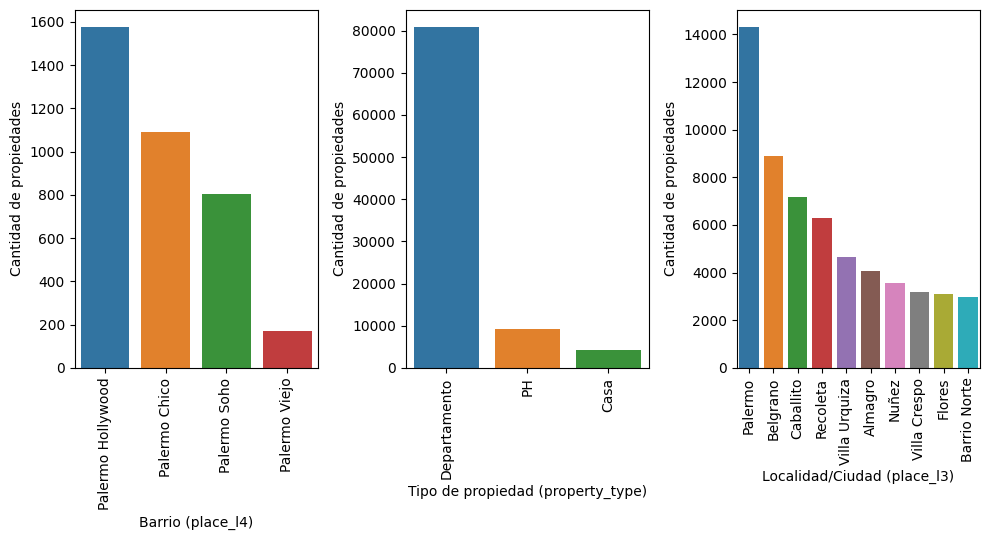

In [16]:
#Grafico boxplots 

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)

ciudades = ds_properati['place_l3'].value_counts().head(10)
sns.barplot(x=ciudades.index, y=ciudades.values).set(xlabel='Localidad/Ciudad (place_l3)', ylabel='Cantidad de propiedades')
plt.sca(ax[0])
plt.xticks(rotation=90)
  
barrios = ds_properati['place_l4'].value_counts().head(10)
sns.barplot(x=barrios.index, y=barrios.values).set(xlabel='Barrio (place_l4)', ylabel='Cantidad de propiedades')
plt.sca(ax[1])
plt.xticks(rotation=90)

types = ds_properati['property_type'].value_counts()
sns.barplot(x=types.index, y=types.values).set(xlabel='Tipo de propiedad (property_type)', ylabel='Cantidad de propiedades')
plt.sca(ax[2])
plt.xticks(rotation=90)

plt.show()

Graficamos las variables cuantitavias

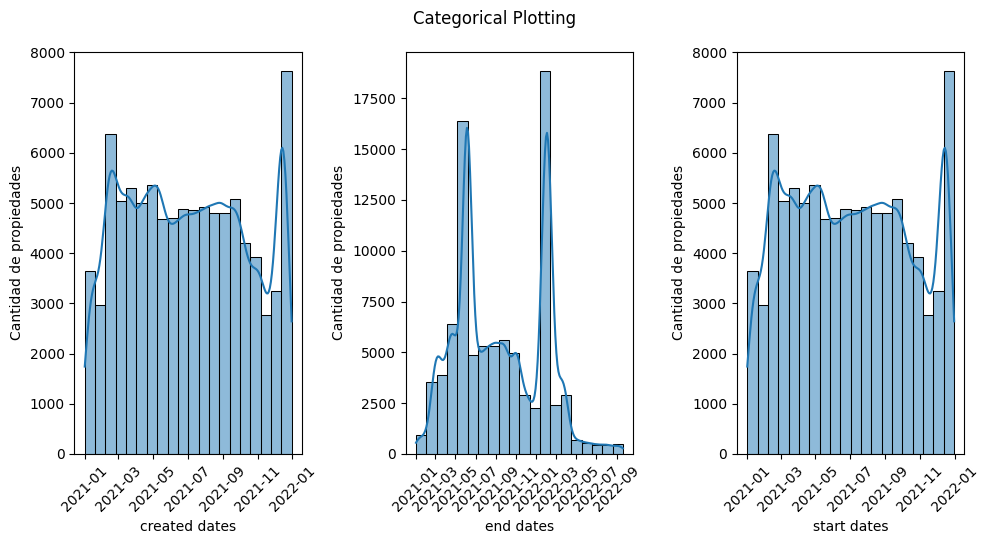

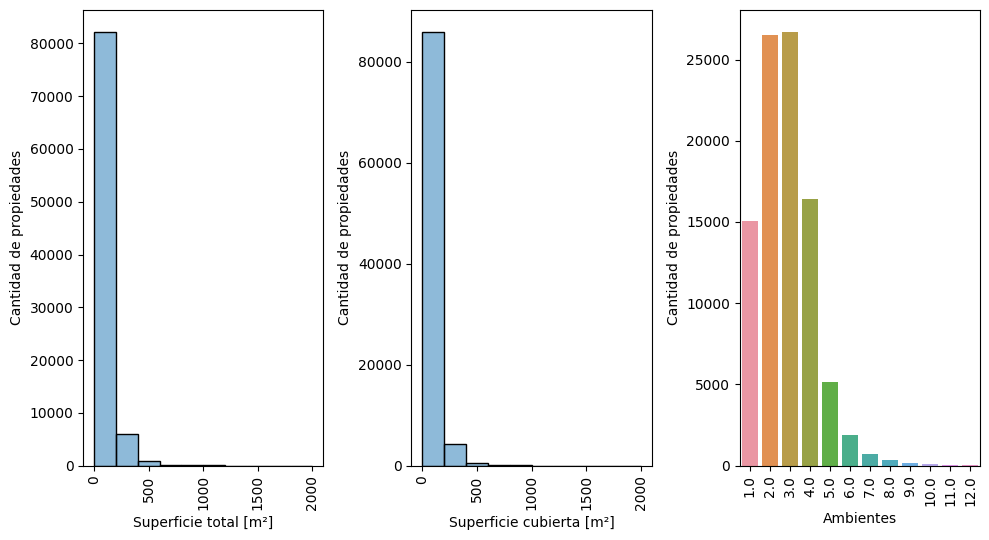

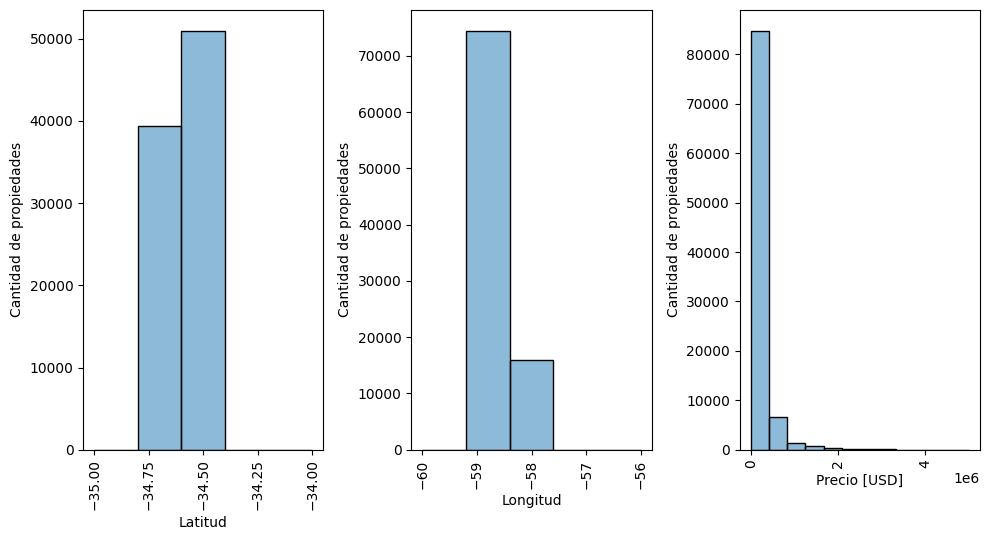

In [17]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')

sns_hist=sns.histplot(bins=20, data=ds_properati['start_date'], kde=True, alpha = 0.5).set(xlabel="start dates",ylabel="Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['created_on'], kde=True, alpha = 0.5).set(xlabel="created dates",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['end_date'], kde=True, alpha = 0.5).set(xlabel="end dates",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=45)
fig.show()

fig, ax = plt.subplots(1,3)

rooms=ds_properati['property_rooms'].value_counts().head(12)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel("Ambientes")
plt.ylabel("Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_total'], alpha=0.5).set(xlabel="Superficie total [m²]",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_covered'], alpha=0.5).set(xlabel="Superficie cubierta [m²]",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=90)
fig.show()


fig, ax = plt.subplots(1,3)
sns_hist=sns.histplot(bins=12, binrange=(0,5e6), data=ds_properati['property_price'], alpha=0.5).set(xlabel="Precio [USD]",ylabel="Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=5, binrange=(-35,-34), data=ds_properati['latitud'], alpha=0.5).set(xlabel="Latitud",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=5, binrange=(-60,-56), data=ds_properati['longitud'], alpha=0.5).set(xlabel="Longitud",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=90)
fig.show()


#### Analisis de correlacion de variables

<AxesSubplot:>

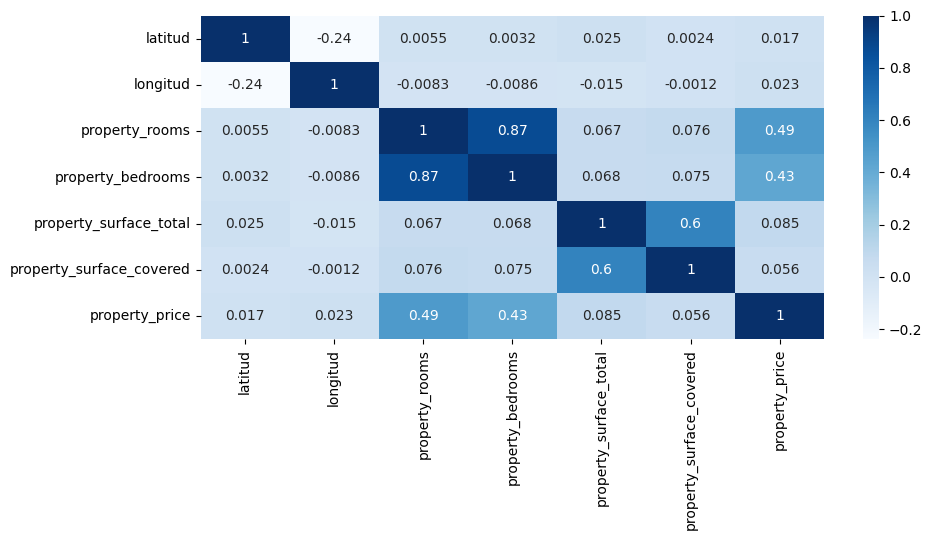

In [18]:
sns.heatmap(data=ds_properati.corr(), annot=True, cmap='Blues')

#### Pares de variables con correlacion considerable:

* property_rooms & property_bedrooms ---> **correlacion positiva**

* property_surface_covered & property_surface_total ---> **correlacion positiva**

* property_rooms & property_price ---> **correlacion positiva**

* property_bedrooms & property_price ---> **correlacion positiva**

En todos los casos tiene sentido que exista una correlacion. La cantidad de 'bedrooms' siempre va a estar limitada superiormente por la cantidad de 'rooms'. Algo parecido sucede con la superficie cubierta sobre la superficie total. Nunca se prodrá cubrir mas que el total. Tambien asi, los precios de las propiedades van a estar determinados, en parte, por la cantidad de ambientes (teniendo en cuenta habitaciones).

Estas condiciones explican la razon de la correlación y por qué tienen sentido.

Sin embargo, visualizando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos, ya que no tienen sentido (aquellos puntos que estén por encima de la recta verde). Por ejemplo, en el segundo grafico podemos ver que hay casos de superficie cubierta mayor a la superficie total, lo cual no tiene sentido. Algo parecido pasa con el primer grafico.

Todos estos aspectos se analizarán en la sección de valores atipicos.

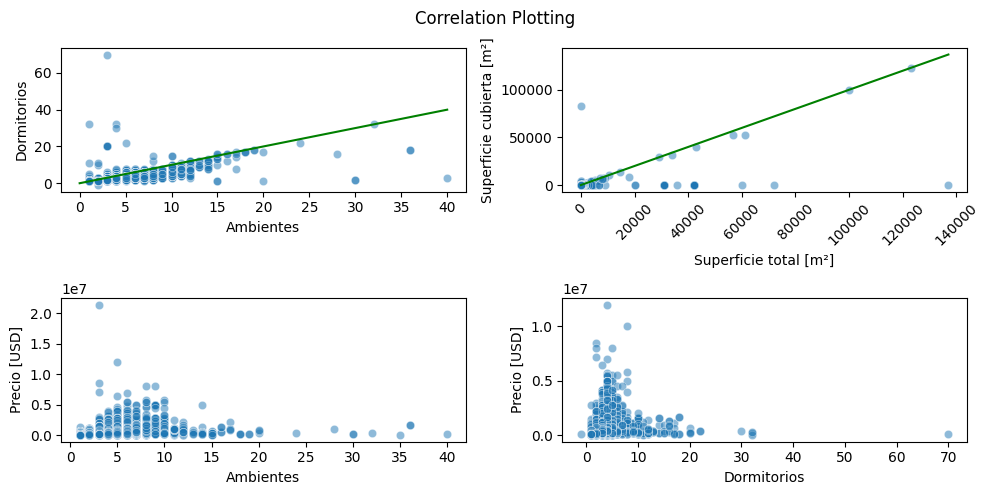

In [19]:
correlacion1 = ds_properati[['property_rooms', 'property_bedrooms']]
max_rooms = correlacion1['property_rooms'].max()

correlacion2 = ds_properati[['property_surface_covered', 'property_surface_total']]
max_surface_total = correlacion2['property_surface_total'].max()

correlacion3 = ds_properati[['property_rooms','property_price']]
correlacion4 = ds_properati[['property_bedrooms','property_price']]

fig, ax = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Correlation Plotting')

sns.scatterplot(x='property_rooms', y='property_bedrooms',data=correlacion1, alpha=0.5, ax = ax[0][0]).set(xlabel='Ambientes', ylabel='Dormitorios')
sns.lineplot(x=[0,max_rooms], y=[0,max_rooms], c='Green', ax = ax[0][0])

sns.scatterplot(x='property_surface_total', y='property_surface_covered',data=correlacion2, alpha=0.5, ax = ax[0][1]).set(xlabel='Superficie total [m²]', ylabel='Superficie cubierta [m²]')
sns.lineplot(x=[0,max_surface_total], y=[0,max_surface_total], c='Green', ax = ax[0][1])
ax[0][1].tick_params(axis='x', rotation=45)

sns.scatterplot(x='property_rooms', y='property_price',data=correlacion3, alpha=0.5, ax = ax[1][0]).set(xlabel='Ambientes', ylabel='Precio [USD]')

sns.scatterplot(x='property_bedrooms', y='property_price',data=correlacion4, alpha=0.5, ax = ax[1][1]).set(xlabel='Dormitorios', ylabel='Precio [USD]')

fig.tight_layout()


### b) Datos faltantes

#### Observaciones generales

Calculamos el porcentaje de datos nulos por columna.

In [20]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100
print(nullable_percentages)

start_date                   0.000000
end_date                     5.348598
created_on                   0.000000
latitud                      3.957602
longitud                     3.957602
place_l3                     0.442445
place_l4                    96.134707
property_type                0.000000
property_rooms               1.107704
property_bedrooms           11.657418
property_surface_total       5.139577
property_surface_covered     3.558658
property_price               0.000000
property_title               0.000000
dtype: float64


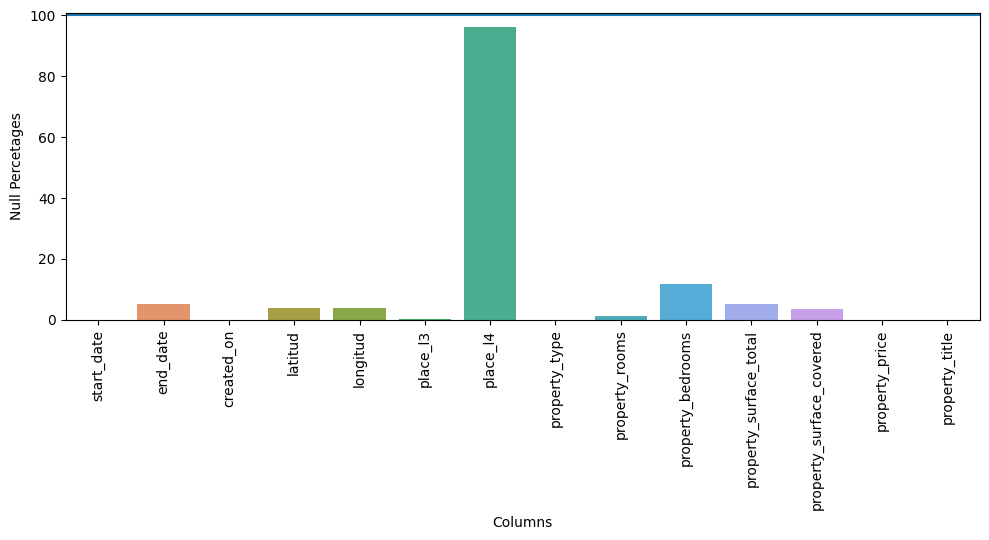

In [21]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100

graph = sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
graph.axhline(100)
plt.xticks(rotation=90)
plt.ylabel("Null Percetages")
plt.xlabel("Columns")
plt.tight_layout()

Podemos observar que la columna place_l4 tiene un porcentaje de nulos de 96.134707% siendo de todas las columnas la que mayor cantidad de nulos posee. Por esto consideramos que no es relevante para nuestro analisis y procederemos a eliminarla.

In [22]:
ds_properati.drop(['place_l4'], axis=1, inplace = True)

Comprobamos que se haya eliminado correctamente

In [23]:
ds_properati.head()

,start_date,end_date,created_on,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,NaN,104.0,146000.0,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,NaN,73.0,250000.0,PH - Boedo


In [24]:
print(ds_properati['start_date'].equals(ds_properati['created_on']))

True


Podemos ver que las columnas `start_date` y `created_on` son exactamente iguales en cuanto a sus valores, por ende podemos quedarnos con una sola de ellas

In [25]:
ds_properati.drop(['created_on'], axis=1, inplace = True)

In [26]:
ds_properati.head()

,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,2021-09-09,2021-09-26,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.0,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.0,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,-34.610027,-58.401934,Once,Departamento,4.0,2.0,NaN,104.0,146000.0,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,NaN,73.0,250000.0,PH - Boedo


Calculamos el porcentaje de datos nulos por fila.

In [27]:
ds=ds_properati.isna().copy()

Aqui podemos observar cuantos valores nulos tiene cada fila.(True== Nan)

In [28]:
ds.head(10)

,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,False,False,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
print("La cantidad de filas que contiene valores nulos son :",ds_properati.isnull().any(axis=1).sum())
nullrowspercentage= (ds_properati.isnull().any(axis=1).sum() / ds_properati.shape[0]) * 100
print("El porcentaje de filas nulas que tiene el dataset es de ",nullrowspercentage,"%")
nullquantityperrow=(ds_properati.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()
print("\n La cantidad de registros que tienen una misma cantidad de nulos \n",nullquantityperrow)
nullperrow= ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100
print("\n El porcentaje de nulos por cada fila es \n",nullperrow)
nullsortedpercentages= (ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
print("\n La cantidad de filas que se tienen un mismo porcentaje \n",nullsortedpercentages)

La cantidad de filas que contiene valores nulos son : 24699
El porcentaje de filas nulas que tiene el dataset es de  26.206113592717163 %

 La cantidad de registros que tienen una misma cantidad de nulos 
 0    69550
1    18101
2     5145
3     1171
4      170
5      110
6        1
7        1
dtype: int64

 El porcentaje de nulos por cada fila es 
 0        25.000000
1         0.000000
2         0.000000
3         8.333333
4         8.333333
           ...    
94244     0.000000
94245     0.000000
94246     0.000000
94247     0.000000
94248     0.000000
Length: 94249, dtype: float64

 La cantidad de filas que se tienen un mismo porcentaje 
 0.000000     69550
8.333333     18101
16.666667     5145
25.000000     1171
33.333333      170
41.666667      110
50.000000        1
58.333333        1
dtype: int64


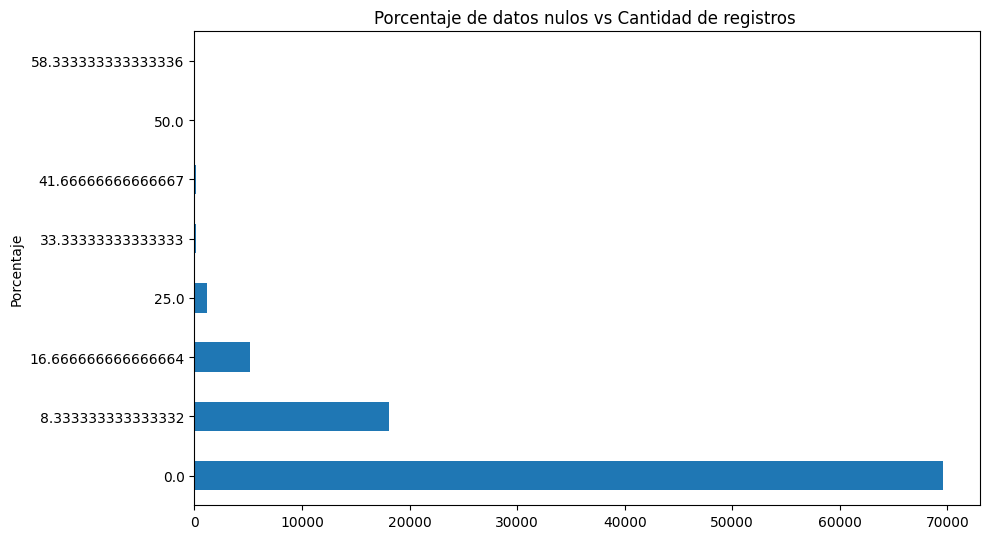

<Figure size 1500x1000 with 0 Axes>

In [30]:
nullsortedpercentages.plot(kind = "barh", title="Porcentaje de datos nulos vs Cantidad de registros ", ylabel="Cantidad de registros",xlabel="Porcentaje")
plt.figure(figsize=(15, 10))
plt.show()

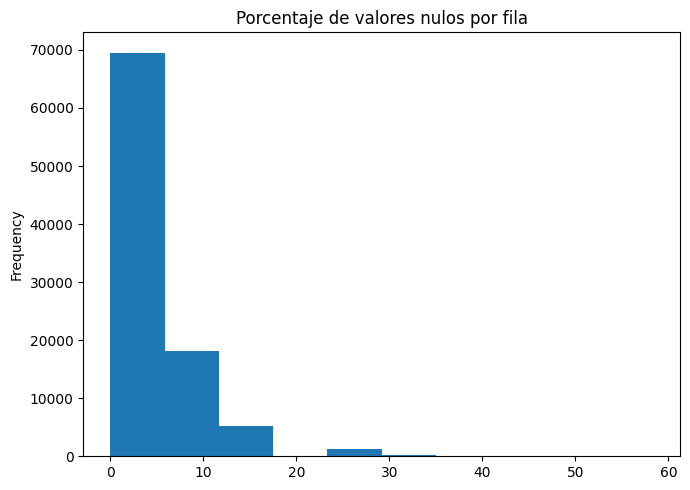

In [31]:
plt.figure(figsize=(7, 5))

nullperrow.sort_values(inplace=True)
nullperrow.plot.hist(bins=10, xlabel='Porcentaje de valores nulos', ylabel='Cantidad de filas', title='Porcentaje de valores nulos por fila')

plt.show()


A partir de la información observada se tomarán criterios a continuación

#### Tratamiento de datos faltantes

En lo que sigue se aplicarán los siguientes criterios generales decididos, teniendo en cuenta los objetivos del trabajo:
- Si una observación posee 3 features con valores faltantes y dos de ellas son latitud y longitud, se elimina la misma. Esto dado a que posteriormente la ubicación precisa de cada propiedad va a ser requerida
- Si una observación posee mas de 4 features con valores faltantes, se tiene información muy escasa de la misma, por lo tanto se elimina.
- Consideramos que la feature end_date no es indispensable para los efectos del análisis que se quiere realizar, por lo tanto procedemos a eliminar dicha feature, conservando las observaciones que tenían valores nulos en dicha columna.
- En el caso de place_l3 al ser solo 240 filas las que tienen nan procedemos a eliminarlas.

- Se realiza imputación de datos sobre valores nulos en las siguientes features (detalles más adelante):
    - property_room y property_bedroom
    - property_surface_total y property_surface_covered 


Procedemos a eliminar las filas que tienen valores nulos en las columnas de longitud y latitud ya que no existe una tecnica que nos permita recuperar o predecir con exactitud estos valores, y son necesarios posteriormente.

In [32]:
ds_properati = ds_properati.dropna(subset=['latitud', 'longitud'])

In [33]:
ds_properati.isnull().sum(axis=1)
ds_properati.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    69550
1    18101
2     2529
3      319
4       20
dtype: int64

Procedemos a eliminar todas las filas que tengan 4 valores nulos .

In [34]:
ds_properati = ds_properati.dropna(thresh=len(ds_properati.columns)-3)


In [35]:
ds_properati.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    69550
1    18101
2     2529
3      319
dtype: int64

In [36]:
ds_properati.isnull().sum()

start_date                      0
end_date                     4755
latitud                         0
longitud                        0
place_l3                      240
property_type                   0
property_rooms                905
property_bedrooms           10473
property_surface_total       4564
property_surface_covered     3179
property_price                  0
property_title                  0
dtype: int64

Procedemos a eliminar las filas que tienen valor nulo en place_l3 (dado que al ser relativamente pocas observaciones no se pierde una cantidad considerable de información) y la feature end_date (dado que no va a ser de utilidad futura para el análisis)

In [37]:
ds_properati = ds_properati.dropna(subset=['place_l3'])
ds_properati = ds_properati.drop(columns=['end_date'])

In [38]:
ds_properati.isnull().sum()

start_date                      0
latitud                         0
longitud                        0
place_l3                        0
property_type                   0
property_rooms                856
property_bedrooms           10414
property_surface_total       4545
property_surface_covered     3177
property_price                  0
property_title                  0
dtype: int64

Proseguimos realizando imputación por regresión entre las siguientes columnas:

- Ambientes y Dormitorios
- Superficie total y Superficie cubierta

Esto dado que las mismas tienen un grado alto de correlación entre sí. 

In [39]:
columnas_a_imputar=['property_rooms','property_bedrooms']
df_con_nans_en_rooms_y_bedrooms = ds_properati[columnas_a_imputar].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) 

array_con_values_tras_imputar_rooms = imp.fit_transform(df_con_nans_en_rooms_y_bedrooms)

df_sin_nans_en_rooms_y_bedrooms = pd.DataFrame(array_con_values_tras_imputar_rooms)
df_sin_nans_en_rooms_y_bedrooms.rename(columns={0:"property_rooms", 1:"property_bedrooms"}, inplace=True)

ds_properati['property_rooms'] = df_sin_nans_en_rooms_y_bedrooms['property_rooms'].values
ds_properati['property_bedrooms'] =  df_sin_nans_en_rooms_y_bedrooms['property_bedrooms'].values

Procedemos a corroborar que no hayan quedado nulos para rooms y bedrooms

In [40]:
ds_properati.isna().sum()

start_date                     0
latitud                        0
longitud                       0
place_l3                       0
property_type                  0
property_rooms                 0
property_bedrooms              0
property_surface_total      4545
property_surface_covered    3177
property_price                 0
property_title                 0
dtype: int64

In [41]:
columnas_a_imputar=['property_surface_total','property_surface_covered']
df_con_nans_en_surfaces = ds_properati[columnas_a_imputar].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) 

array_con_values_tras_imputar_surfaces = imp.fit_transform(df_con_nans_en_surfaces)

df_sin_nans_en_surfaces = pd.DataFrame(array_con_values_tras_imputar_surfaces)
df_sin_nans_en_surfaces.rename(columns={0:"property_surface_total", 1:"property_surface_covered"}, inplace=True)

ds_properati['property_surface_total'] = df_sin_nans_en_surfaces['property_surface_total'].values
ds_properati['property_surface_covered'] =  df_sin_nans_en_surfaces['property_surface_covered'].values

Finalmente corroboramos que no hayan quedado nulos en general

In [42]:
ds_properati.isna().sum()

start_date                  0
latitud                     0
longitud                    0
place_l3                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

##### *Analizamos las distribuciones de las variables antes y despues de su imputacion*

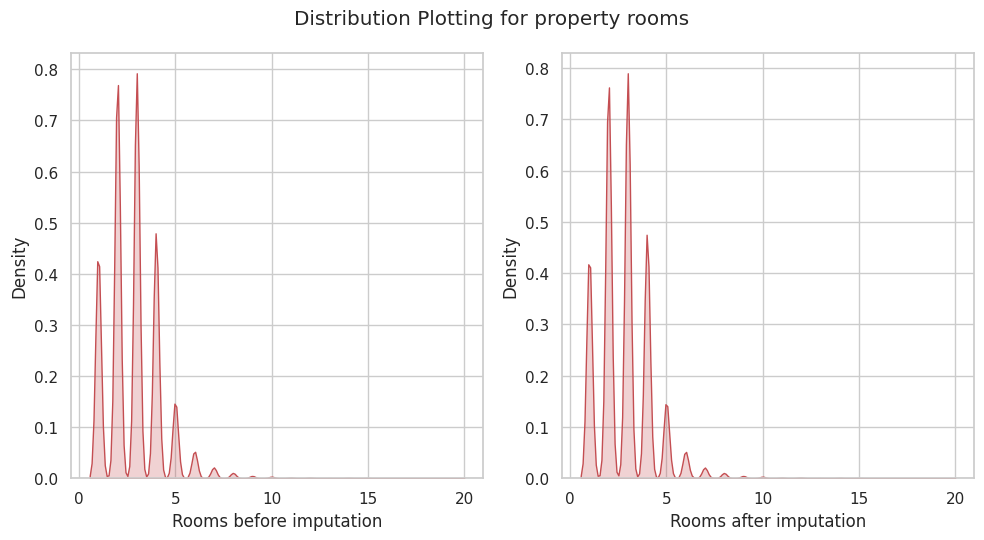

In [43]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution Plotting for property rooms')

fig = sns.kdeplot(df_sin_nans_en_rooms_y_bedrooms['property_rooms'], shade=True, color="r", clip=(0,20)).set(xlabel='Rooms after imputation')
plt.sca(ax[0])

fig = sns.kdeplot(df_con_nans_en_rooms_y_bedrooms['property_rooms'], shade=True, color="r", clip=(0,20)).set(xlabel='Rooms before imputation')
plt.sca(ax[1])

plt.show()

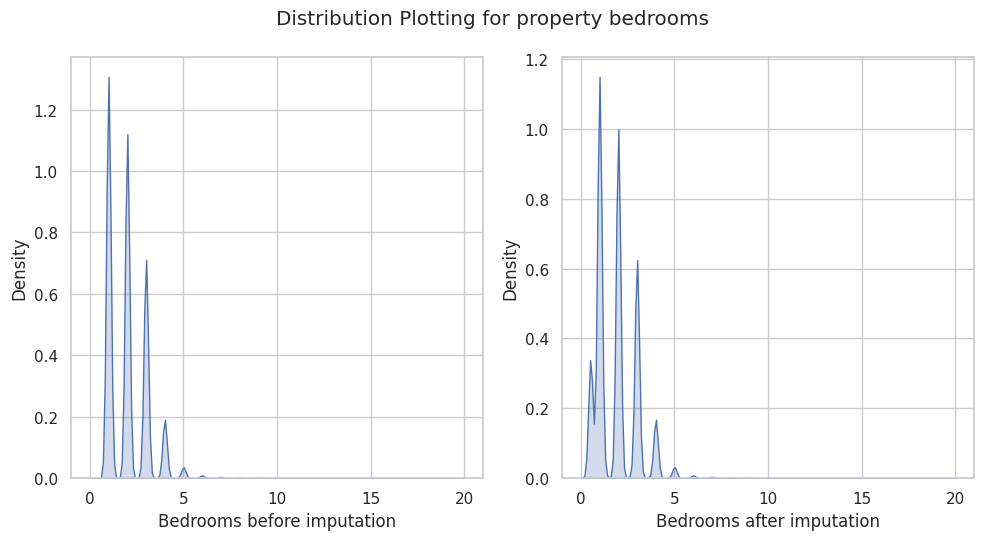

In [44]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution Plotting for property bedrooms')

fig = sns.kdeplot(df_sin_nans_en_rooms_y_bedrooms['property_bedrooms'], shade=True, color="b", clip=(0,20)).set(xlabel='Bedrooms after imputation')
plt.sca(ax[0])

fig = sns.kdeplot(df_con_nans_en_rooms_y_bedrooms['property_bedrooms'], shade=True, color="b", clip=(0,20)).set(xlabel='Bedrooms before imputation')
plt.sca(ax[1])

plt.show()

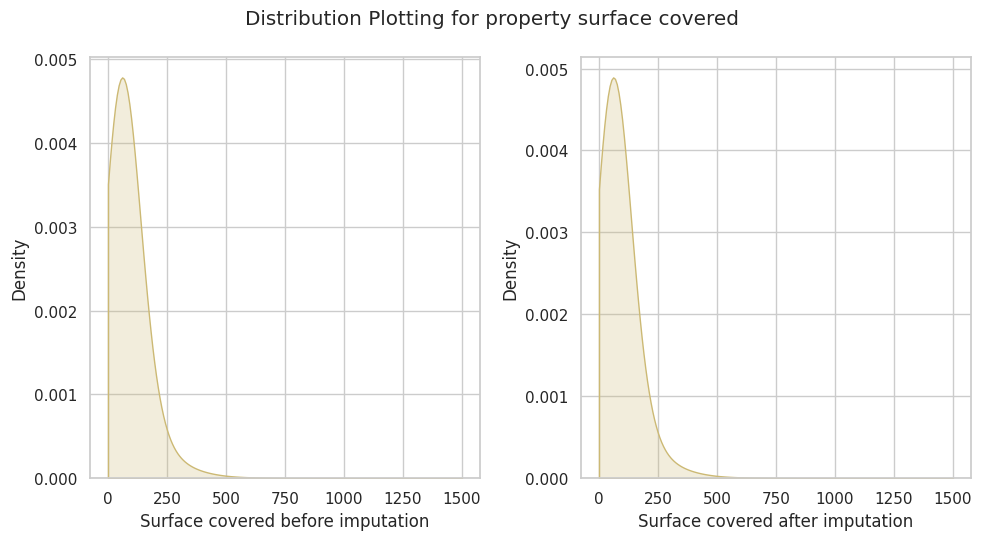

In [45]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution Plotting for property surface covered')

fig = sns.kdeplot(df_sin_nans_en_surfaces['property_surface_covered'], shade=True, color="y", clip=(0,1500)).set(xlabel='Surface covered after imputation')
plt.sca(ax[0])

fig = sns.kdeplot(df_con_nans_en_surfaces['property_surface_covered'], shade=True, color="y", clip=(0,1500)).set(xlabel='Surface covered before imputation')
plt.sca(ax[1])


plt.show()

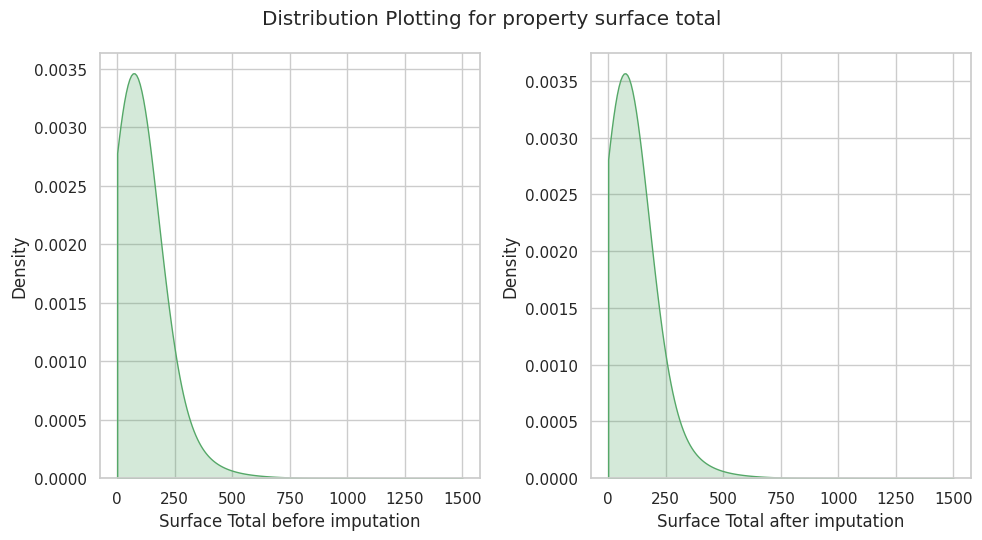

In [46]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution Plotting for property surface total')

fig = sns.kdeplot(df_sin_nans_en_surfaces['property_surface_total'], shade=True, color="g", clip=(0,1500)).set(xlabel='Surface Total after imputation')
plt.sca(ax[0])

fig = sns.kdeplot(df_con_nans_en_surfaces['property_surface_total'], shade=True, color="g", clip=(0,1500)).set(xlabel='Surface Total before imputation')
plt.sca(ax[1])


plt.show()

### c) Valores atípicos

Para detectar valores atipicos se realizarán 2 tipos de analisis:
- El **primero** correspondiente a detección de outliers de forma **univariada**.
- El **segundo** correspondiente a detección de outliers de forma **multivariada**.

#### Análisis Univariado

Procedemos con el **primer analisis** graficando distintas variables que consideramos que pueden empezar siendo analizadas de forma **univariada**.

Entre ellas utilizando la cantidad de ambientes, dormitorios, superficie total, superficie cubierta y precio de las propiedades (distinguidos segun tipo de propiedad). 
[Por medio de Boxplots y posteriormente Z-score]

**Nota de criterio elegido**: El analisis general de los boxplots se realizó definiendo a las observaciones que consideramos como outliers a partir de ***3\*IQR (3 veces el rango intercuartilico)*** en vez de ***1.5\*IQR*** (como viene por defecto). Esto debido a que queremos conservar un amplio rango de observaciones como valores relativamente comúnes, de tal forma que se analicen como outliers solo las observaciones que se alejen de forma severa de la media. 

El análisis de Z-score (realizado despues del análisis de boxplots) se efectúa solo para verificar el porcentaje de observaciones que resulta alejado 3 desviaciones estandar de la media, aún luego de haberse
aplicado un tratamiento en en análisis anterior. De esta forma corroboramos, por medio de un análisis univariado distinto, que se admiten ciertos valores para su permanencia en el dataset.

Comenzamos creando una copia del dataset donde iremos revisando los outliers.

In [47]:
df_preprocesado = ds_properati.copy()

Definimos una funcion auxiliar para ploteo de boxplots separadas por tipo de propiedad, siendo `y_from_df` la feature a analizar:

In [48]:
def boxplot_for_outliers_according_to_property_type(y_from_df: str, title: str, y_label: str):
    fig, ax = plt.subplots(1,3)
    fig.suptitle(title)

    properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
    sns.boxplot(y=y_from_df,data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel=y_label)
    plt.sca(ax[0])
    plt.xticks(rotation=45)

    properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
    sns.boxplot(y=y_from_df,data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel=y_label)
    plt.sca(ax[1])
    plt.xticks(rotation=45)

    properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
    sns.boxplot(y=y_from_df,data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel=y_label)
    plt.sca(ax[2])
    plt.xticks(rotation=45)

    fig.show()

##### *Analisis de la cantidad de ambientes*

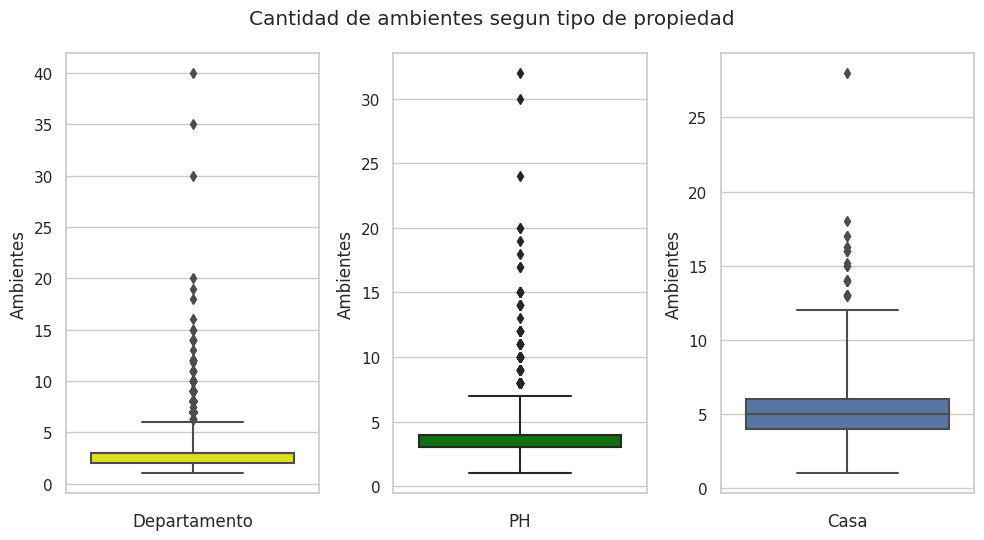

In [49]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_rooms', 
    title='Cantidad de ambientes segun tipo de propiedad', 
    y_label='Ambientes'
)


Observamos que para las propiedades de tipo casa hay varios outliers con cantidad de ambientes entre 13 (aprox) a 20 y un valor excepcional de una casa con 27 ambientes (aprox). 

Tambien observamos para las propiedades de tipo departamento que hay varios outliers con cantidad de ambientes entre 6 (aprox) a 20 , y algunos valores excepcionales de departamentos con 30, 35 y 40 ambientes.

Para las propiedades de tipo PH, hay varios outliers con cantidad de ambientes entre 7 (aprox) a 15, algunos PH con entre 15 y 20 ambientes, y casos de 24 (aprox) y 30 ambientes.

Concluimos que los departamentos, PH , casas  que poseen mas de cierta cantidad de ambientes deben ser o un error de carga o puede estar tratandose de un hotel/residencia completa, por ende el número es elevado.

Consideramos que, a partir de lo anterior, podemos descartar observaciones que tengan valores que excedan por lejos lo que se consideraría como una cantidad admisible de ambientes para una sola vivienda individual (lo cual es lo que se busca analizar).

Por lo tanto se procede a eliminar, en base a lo observado:

- Observaciones de Casas con más de 12 ambientes
- Observaciones de PHs con más de 7 ambientes
- Observaciones de Departamentos con más de 6 ambientes

In [50]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_rooms"] > 12.5)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_rooms"] > 7.5)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_rooms"] > 6)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 90259
Post filtro - cantidad de filas: 89429


Graficamos el resultado tras filtrar

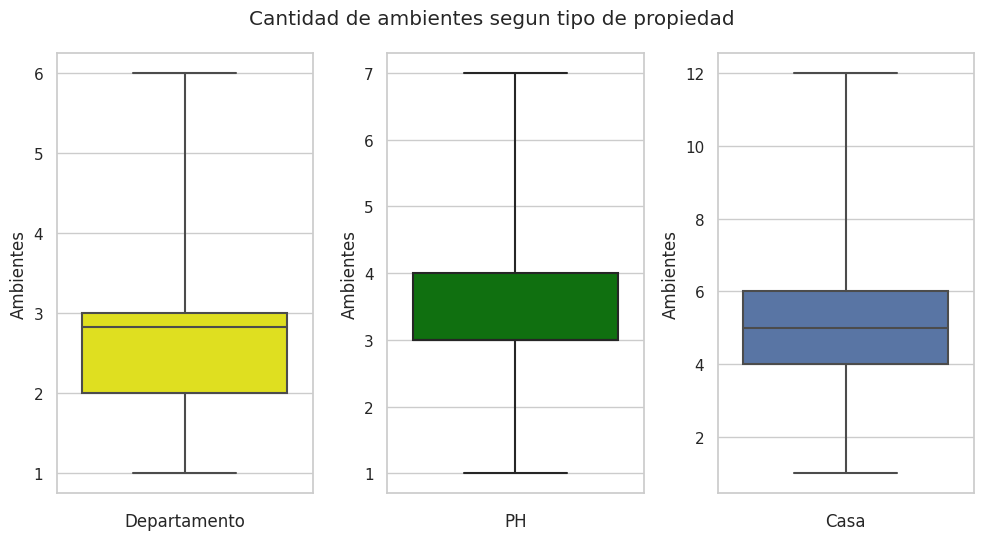

In [51]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_rooms', 
    title='Cantidad de ambientes segun tipo de propiedad', 
    y_label='Ambientes'
)

##### *Analisis de la cantidad de dormitorios*

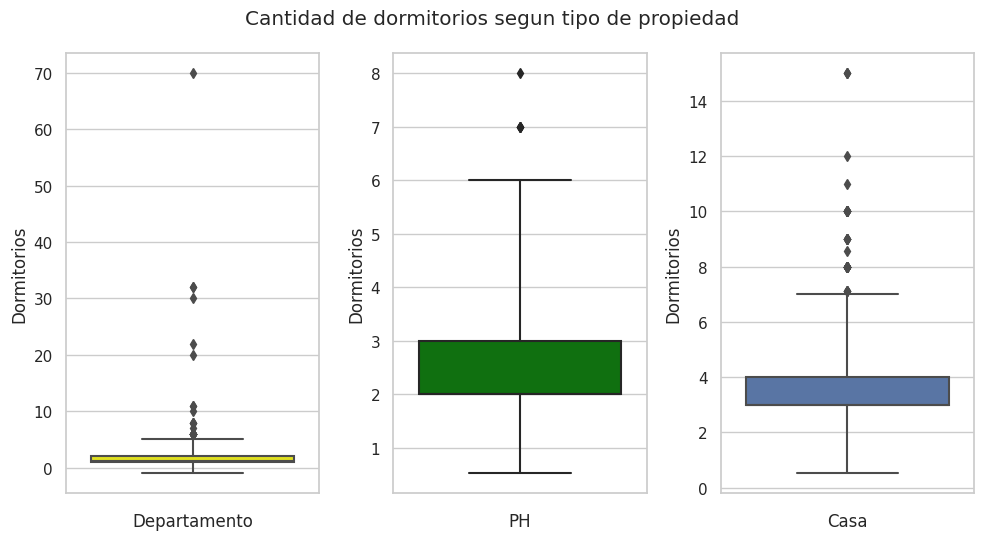

In [52]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_bedrooms', 
    title='Cantidad de dormitorios segun tipo de propiedad', 
    y_label='Dormitorios'
)

In [53]:
print("Cantidad de observaciones con dormitorios negativos: %d" 
% (df_preprocesado[df_preprocesado['property_bedrooms'] < 0].shape[0]))
print('Indice y tipo de propiedad de las observaciones con dormitorios negativos:\n %s'
 % ( df_preprocesado[df_preprocesado['property_bedrooms'] < 0].property_type))

Cantidad de observaciones con dormitorios negativos: 1
Indice y tipo de propiedad de las observaciones con dormitorios negativos:
 82905    Departamento
Name: property_type, dtype: object


Siguiendo por la misma linea de consideraciones tomadas en el analisis de ambientes, en base a lo observado se procede eliminando:

- Observaciones de Casas con más de 7 dormitorios
- Observaciones de PHs con más de 6 dormitorios
- Observaciones de Departamentos con más de 5 dormitorios

Además tener en cuenta que se tiene un valor anómalo de un departamento con "-1" dormitorios. Consideramos a partir de su numero de ambientes (2) que pudo haberse tratado de un error al ingresar el dato, tratandose en realidad de una vivienda con 1 dormitorio.


In [54]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_bedrooms"] > 7)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_bedrooms"] > 6)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_bedrooms"] > 5)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

## Habia una muestra con property_bedroom con -1 pensamos que es un error y quisieron poner 1 ya que existen 2 property_rooms
df_preprocesado.at[82905,'property_bedrooms'] = 1

Previo filtro - cantidad de filas: 89429
Post filtro - cantidad de filas: 89348


Grafico del resultrado tras el filtro

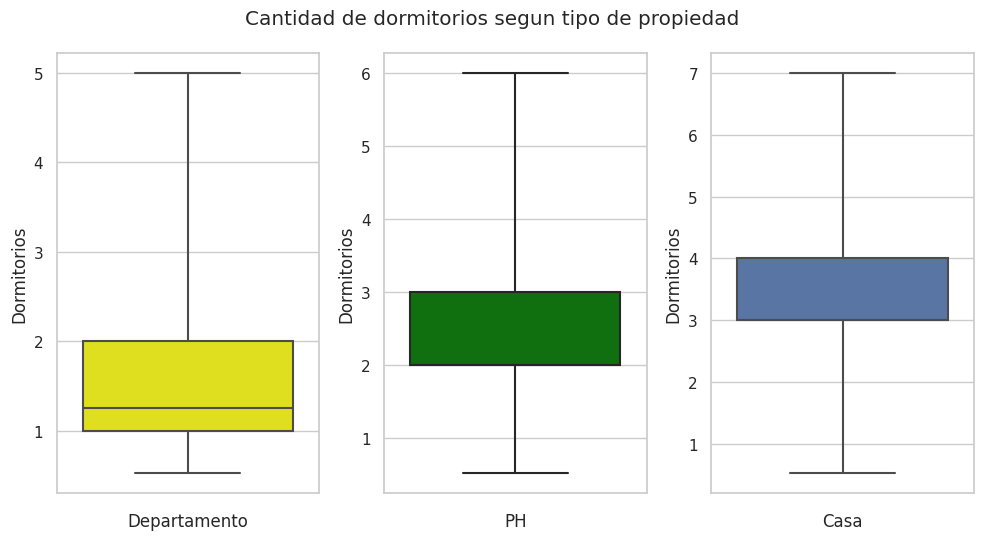

In [55]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_bedrooms', 
    title='Cantidad de dormitorios segun tipo de propiedad', 
    y_label='Dormitorios'
)

##### *Analisis de superficie total*

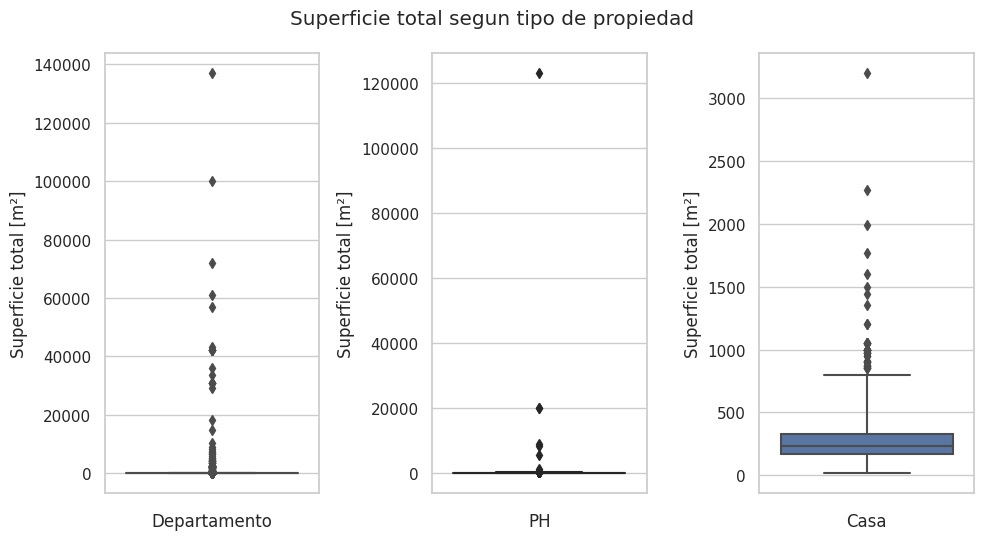

In [56]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_total', 
    title='Superficie total segun tipo de propiedad', 
    y_label='Superficie total [m²]'
)

Como se puede observar, existen observaciones con superficies totales cuyos valores exceden en gran medida lo que se consideraría como una sola propiedad de clase vivienda. 

Dado se pretenden analizar datos que correspondan a esa clase de propiedad, se decidió (teniendo en cuenta lo observado) admitir viviendas con superficies totales de:
- A lo sumo 2000 metros cuadrados para el caso de Casas y PHs.   
- A lo sumo 1000 metros cuadrados para el caso de Departamentos.
Revisamos que podria ser que los valores de Departamento y PH esten en otras unidades con respecto a Casa

In [57]:
outlier_departamento_th = 1000
outlier_ph_th = 2000
outlier_casa_th = 2000
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.109739
 - PH 0.066815
 - Casa 0.052315


In [58]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 89348
Post filtro - cantidad de filas: 89256


Se grafica el resultado tras aplicar el filtro

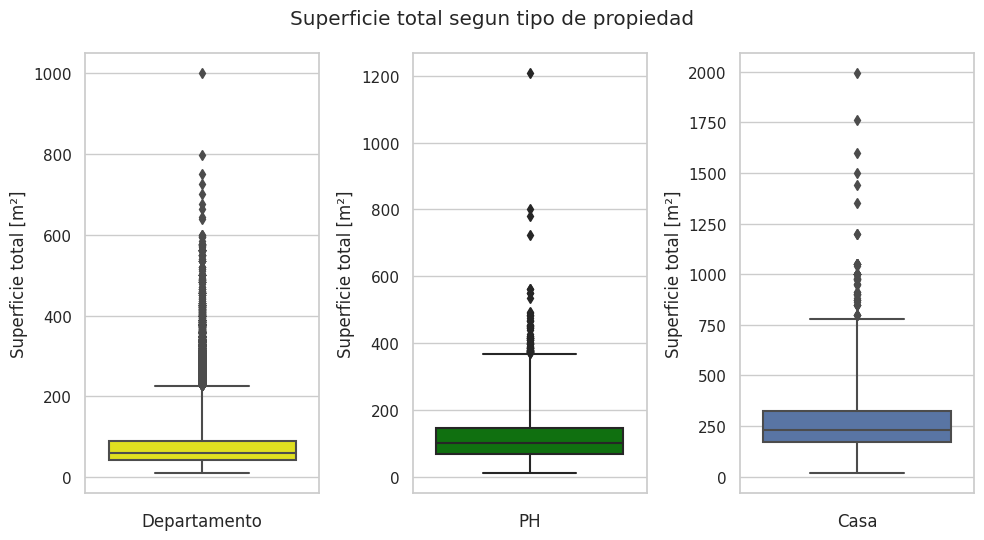

In [59]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_total', 
    title='Superficie total segun tipo de propiedad', 
    y_label='Superficie total [m²]'
)

Luego, tras visualizar nuevamente el limite superior de las muestras que permanecen en el IQR, se observa una cantidad moderada remanente de outliers. 
Se decide entonces admitir:
- A lo sumo 230 m² de superficie total por departamento
- A lo sumo 370 m² de superficie total por PH
- A lo sumo 800 m² de superficie total por casa

In [60]:
outlier_departamento_th = 230
outlier_ph_th = 370
outlier_casa_th = 800
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 2.416918
 - PH 0.757745
 - Casa 1.360900


In [61]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 89256
Post filtro - cantidad de filas: 87288


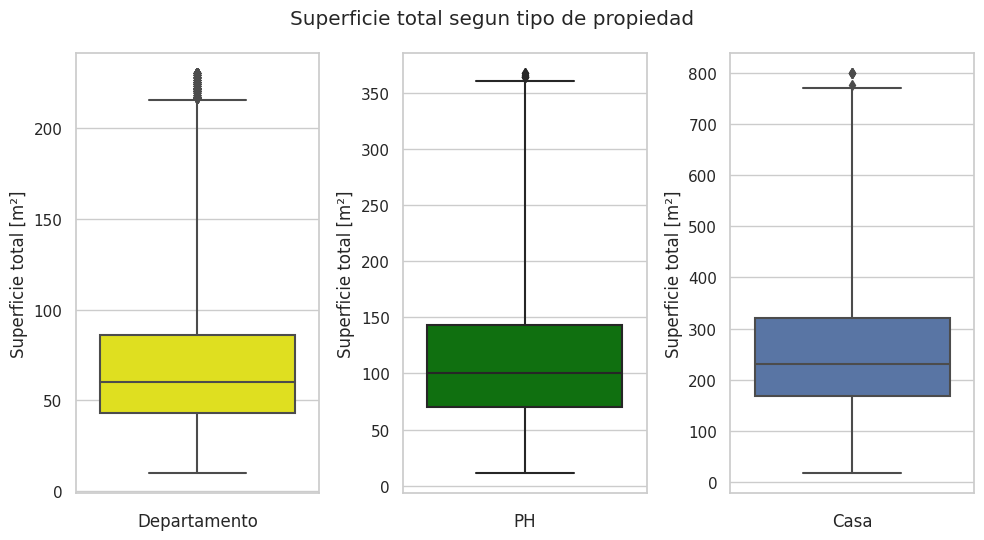

In [62]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_total', 
    title='Superficie total segun tipo de propiedad', 
    y_label='Superficie total [m²]'
)

##### *Analisis de la superficie cubierta*

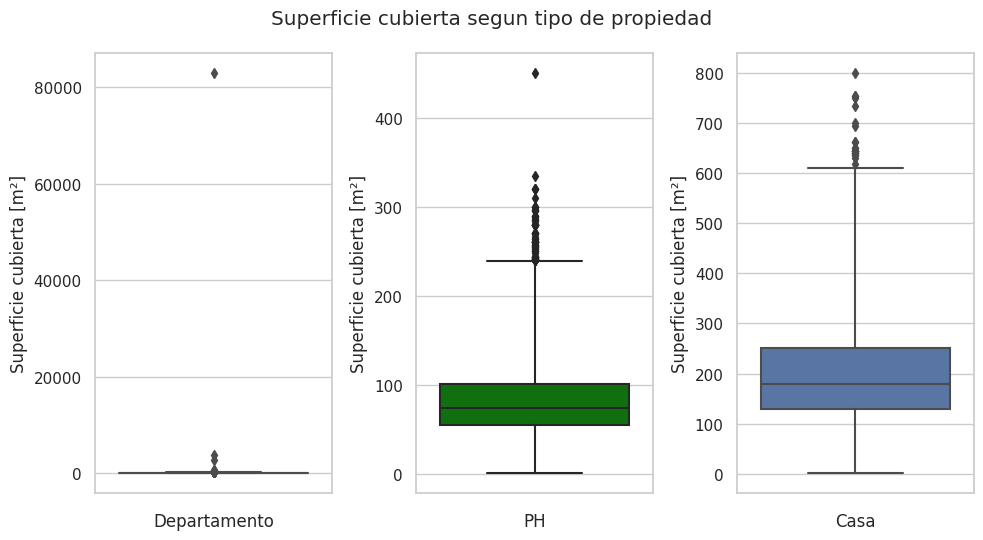

In [63]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_covered', 
    title='Superficie cubierta segun tipo de propiedad', 
    y_label='Superficie cubierta [m²]'
)

Para la superficie cubierta se observan resultados similares al analisis de superficie total, y continuando con el mismo criterio se decide, teniendo en cuenta lo observado, admitir viviendas con superficies cubiertas de:
- A lo sumo 800 metros cuadrados para el caso de Casas y PHs.   
- A lo sumo 600 metros cuadrados para el caso de Departamentos.   

In [64]:
outlier_departamento_th = 600
outlier_ph_th = 800
outlier_casa_th = 800
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_covered"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_covered"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_covered"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.006701
 - PH 0.000000
 - Casa 0.000000


In [65]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado['property_surface_covered'] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado['property_surface_covered'] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado['property_surface_covered'] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 87288
Post filtro - cantidad de filas: 87283


Graficamos los resultados del filtro

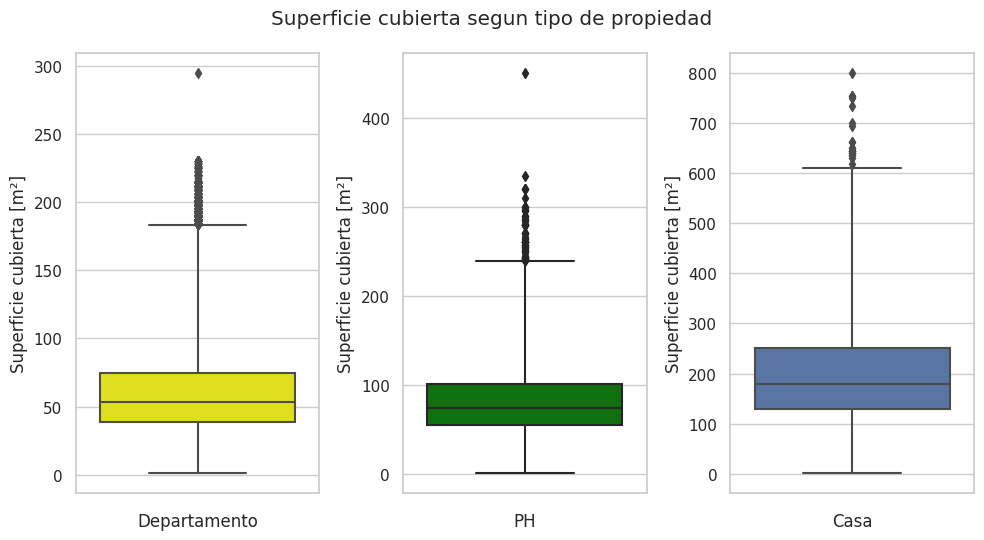

In [66]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_covered', 
    title='Superficie cubierta segun tipo de propiedad', 
    y_label='Superficie cubierta [m²]'
)

Ahora que se puede observar más claramente la delimitación superior, vemos que debemos ajustar más los valores de filtrado. 
Se decide entonces:
- A lo sumo 200 m² de superficie cubierta por departamento
- A lo sumo 300 m² de superficie cubierta por PH
- A lo sumo 700 m² de superficie cubierta por casa

In [67]:
outlier_departamento_th = 200
outlier_ph_th = 300
outlier_casa_th = 700
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_covered"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_covered"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_covered"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado['property_surface_covered'] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado['property_surface_covered'] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado['property_surface_covered'] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.453035
 - PH 0.067370
 - Casa 0.132661
Previo filtro - cantidad de filas: 87283
Post filtro - cantidad de filas: 86934


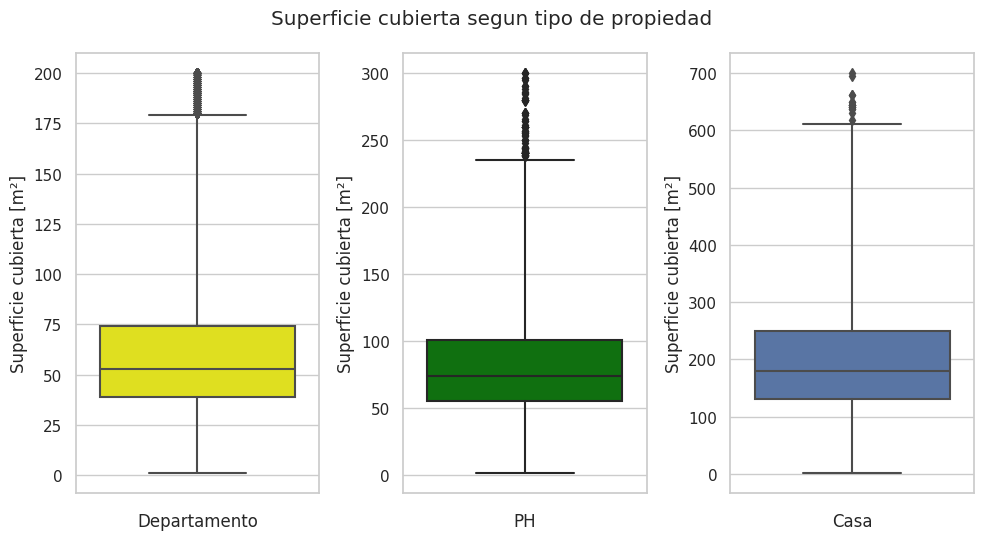

In [68]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_surface_covered', 
    title='Superficie cubierta segun tipo de propiedad', 
    y_label='Superficie cubierta [m²]'
)

##### *Analisis de precios*

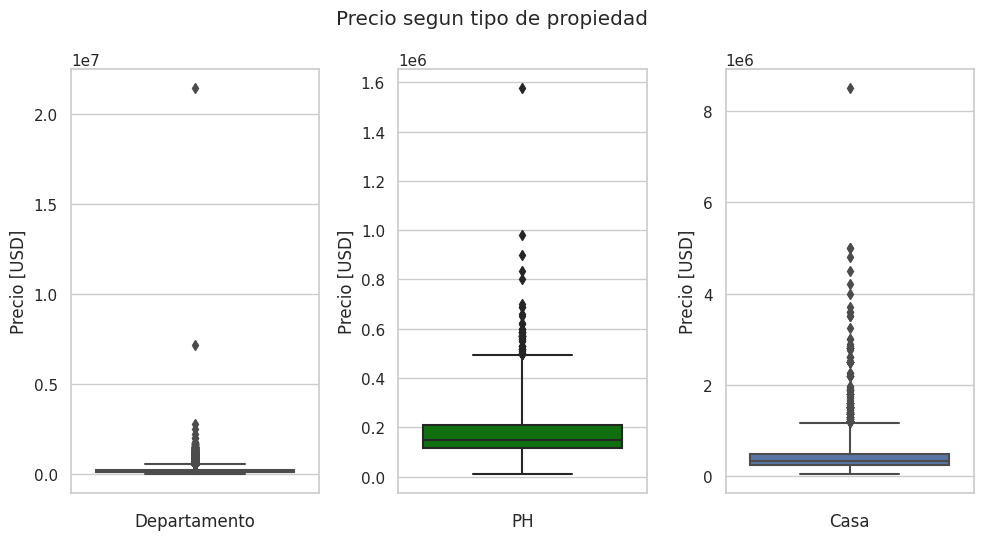

In [69]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_price', 
    title='Precio segun tipo de propiedad', 
    y_label='Precio [USD]'
)

Siguiendo con el mismo criterio que los features anteriores, se considera adecuada la eliminación (cuidadosamente) de:
- Observaciones de Casas con precio de a lo sumo medio millon de dolares
- Observaciones de PHs con precio de a lo sumo 800 mil dolares
- Observaciones de Departamentos con precio de a lo sumo 800 mil dolares

**Sin embargo tener en cuenta que para esta feature se va a tener un margen bastante más amplio de valores admitidos a pesar de ser marcados como outliers por la visualización.** Esto es debido a que consideramos que, debido a que es un factor clave del objetivo del trabajo, el precio debe tratarse con mucha más consideracion hacia valores altos, por lo menos para no descartar observaciones inncesariamente sin antes haber realizado un análisis multivariado de outliers.    

In [70]:
outlier_departamento_th = 0.8e6
outlier_ph_th = 0.8e6
outlier_casa_th = 1.5e6
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_price"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_price"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_price"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_price"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_price"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_price"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.904807
 - PH 0.044944
 - Casa 2.125399
Previo filtro - cantidad de filas: 86934
Post filtro - cantidad de filas: 86178


Se grafica el resultado del filtrado

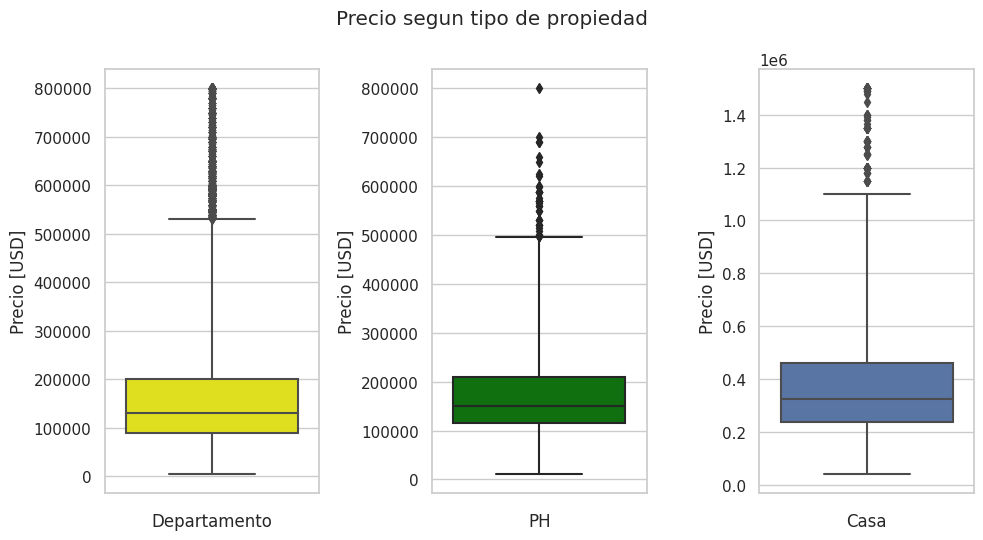

In [71]:
boxplot_for_outliers_according_to_property_type(
    y_from_df='property_price', 
    title='Precio segun tipo de propiedad', 
    y_label='Precio [USD]'
)

#### Análisis univariado [Z-score]:

Verificamos observaciones que se desvien en 3 o más desvíos estandar de la media (para cada columna cuantitativa importante) tras haber realizado un primer tratamiento en el análisis anterior.

In [72]:
ds_zscore = pd.DataFrame()
ds_zscore['z_score_rooms']=st.zscore(df_preprocesado.property_rooms, nan_policy='omit')
ds_zscore['z_score_bedrooms']=st.zscore(df_preprocesado.property_bedrooms, nan_policy='omit')
ds_zscore['z_score_surface_total'] = st.zscore(df_preprocesado.property_surface_total, nan_policy='omit')
ds_zscore['z_score_surface_covered'] = st.zscore(df_preprocesado.property_surface_covered, nan_policy='omit')
ds_zscore['z_score_price'] = st.zscore(df_preprocesado.property_price)

cantidad_obs_desviadas_pos = df_preprocesado[ds_zscore['z_score_rooms']>3].shape[0]
cantidad_obs_desviadas_neg = df_preprocesado[ds_zscore['z_score_rooms']<-3].shape[0]
cantidad_obs_desviadas = cantidad_obs_desviadas_pos + cantidad_obs_desviadas_neg
print( 
    'Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA ROOMS): \n  {} (>3)  ;  {} (<-3)'.format(
        cantidad_obs_desviadas_pos,
        cantidad_obs_desviadas_neg
    ) 
)
print('Porcentaje de observaciones con respecto a totalidad de muestras:\n  {}%\n'.format(
        (cantidad_obs_desviadas / df_preprocesado.shape[0])*100
    )
)

cantidad_obs_desviadas_pos = df_preprocesado[ds_zscore['z_score_bedrooms']>3].shape[0]
cantidad_obs_desviadas_neg = df_preprocesado[ds_zscore['z_score_bedrooms']<-3].shape[0]
cantidad_obs_desviadas = cantidad_obs_desviadas_pos + cantidad_obs_desviadas_neg
print( 
    'Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA BEDROOMS): \n  {} (>3)  ;  {} (<-3)'.format(
        cantidad_obs_desviadas_pos,
        cantidad_obs_desviadas_neg
    ) 
)
print('Porcentaje de observaciones con respecto a totalidad de muestras:\n  {}%\n'.format(
        (cantidad_obs_desviadas / df_preprocesado.shape[0])*100
    )
)

cantidad_obs_desviadas_pos = df_preprocesado[ds_zscore['z_score_surface_total']>3].shape[0]
cantidad_obs_desviadas_neg = df_preprocesado[ds_zscore['z_score_surface_total']<-3].shape[0]
cantidad_obs_desviadas = cantidad_obs_desviadas_pos + cantidad_obs_desviadas_neg
print( 
    'Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA SURFACE TOTAL): \n  {} (>3)  ;  {} (<-3)'.format(
        cantidad_obs_desviadas_pos,
        cantidad_obs_desviadas_neg
    ) 
)
print('Porcentaje de observaciones con respecto a totalidad de muestras:\n  {}%\n'.format(
        (cantidad_obs_desviadas / df_preprocesado.shape[0])*100
    )
)

cantidad_obs_desviadas_pos = df_preprocesado[ds_zscore['z_score_surface_covered']>3].shape[0]
cantidad_obs_desviadas_neg = df_preprocesado[ds_zscore['z_score_surface_covered']<-3].shape[0]
cantidad_obs_desviadas = cantidad_obs_desviadas_pos + cantidad_obs_desviadas_neg
print( 
    'Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA SURFACE COVERED): \n  {} (>3)  ;  {} (<-3)'.format(
        cantidad_obs_desviadas_pos,
        cantidad_obs_desviadas_neg
    ) 
)
print('Porcentaje de observaciones con respecto a totalidad de muestras:\n  {}%\n'.format(
        (cantidad_obs_desviadas / df_preprocesado.shape[0])*100
    )
)

cantidad_obs_desviadas_pos = df_preprocesado[ds_zscore['z_score_price']>3].shape[0]
cantidad_obs_desviadas_neg = df_preprocesado[ds_zscore['z_score_price']<-3].shape[0]
cantidad_obs_desviadas = cantidad_obs_desviadas_pos + cantidad_obs_desviadas_neg
print( 
    'Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA PRICE): \n  {} (>3)  ;  {} (<-3)'.format(
        cantidad_obs_desviadas_pos,
        cantidad_obs_desviadas_neg
    ) 
)
print('Porcentaje de observaciones con respecto a totalidad de muestras:\n  {}%\n'.format(
        (cantidad_obs_desviadas / df_preprocesado.shape[0])*100
    )
)


Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA ROOMS): 
  506 (>3)  ;  0 (<-3)
Porcentaje de observaciones con respecto a totalidad de muestras:
  0.5871568149643761%

Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA BEDROOMS): 
  696 (>3)  ;  0 (<-3)
Porcentaje de observaciones con respecto a totalidad de muestras:
  0.8076307178166122%

Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA SURFACE TOTAL): 
  1594 (>3)  ;  0 (<-3)
Porcentaje de observaciones con respecto a totalidad de muestras:
  1.8496600060340225%

Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA SURFACE COVERED): 
  1440 (>3)  ;  0 (<-3)
Porcentaje de observaciones con respecto a totalidad de muestras:
  1.6709601058274732%

Observaciones alejadas en 3 o más desvíos estandar de la media (COLUMNA PRICE): 
  1944 (>3)  ;  0 (<-3)
Porcentaje de observaciones con respecto a totalidad de muestras:
  2.255796142867089%



Graficamos histograma para visualizar la distribucion de valores del Z-score del feature precio 

[Text(0.5, 0, 'Std deviation'), Text(0, 0.5, 'Property quantity')]

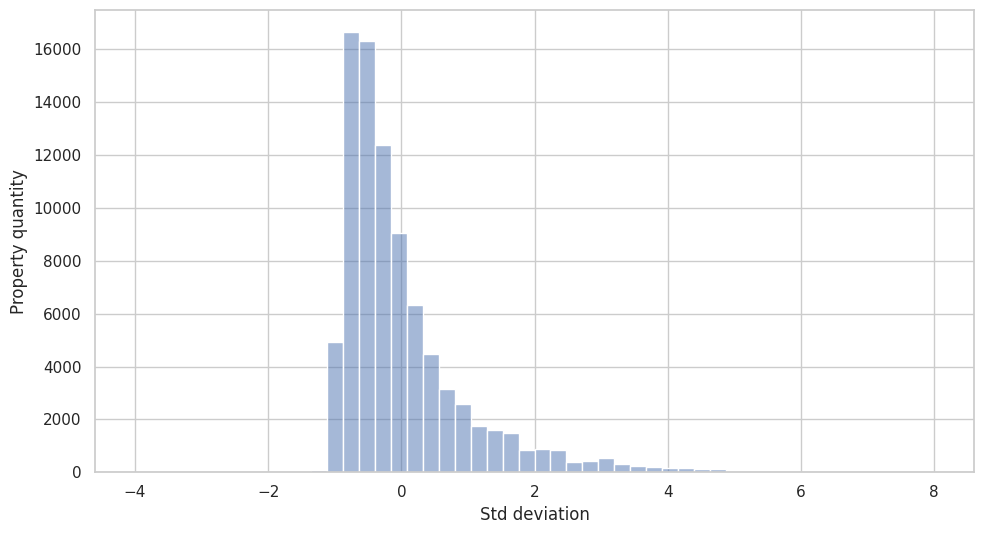

In [73]:
sns.histplot(bins=50, binrange=(-4,8) ,data=ds_zscore['z_score_price'], alpha = 0.5).set(xlabel="Std deviation",ylabel="Property quantity")

Como se muestra en las dos celdas anteriores, se concluye que hubo filtración de outliers suficiente en el análisis previo como para retener una cantidad que consideramos adecuada por cada columna, preservando un porcentaje relativamente pequeño con respecto al dataset, pero una cantidad considerable de admitidos para seguir manteniendo variabilidad de los datos y outliers a ser analizados de forma multivariada.

#### Análisis multivariado

Para el análisis multivariado de outliers se va a utilizar clustering (entre variables con alto grado de correlación) y se realizará detección de los mismos a partir de la distancia de Mahalanobis, imponiendo como umbral un threshold del 0.99 en la distribución chi cuadrado (este threshold se toma para poder detectar outliers que se consideren extremos exclusivamente y luego analizar otros valores manualmente por separado)

Adicionalmente se realizará el mismo análisis comparando las variables precio y superficie total, que si bien su indice de correlación no es alto, puede ser analizado igualmente.

Comenzamos definiendo funciones auxiliares para calculo de outliers segun la distancia de Mahalanobis y el threshold indicado anteriormente, y para plot de la elipse generada por dicha delimitación.

In [74]:
def mahalanobis_outliers(df, cutoffThreshold=0.99):
    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and 
    distances = []
    for i, val in enumerate(df):
        p1 = val
        p2 = centerpoint
        distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
        distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = st.chi2.ppf(0.99, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index of Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observations found as outlier -----')
    print(df[ distances > cutoff , :])
    # print('size of datset: %f' % (df_outlier_1.count()))
    print('Porcentaje de outliers: %.3f %%' % (df[ distances > cutoff , :].size*100 / df.shape[0]))
    return outlierIndexes, covariance, centerpoint, cutoff

def print_mahalanobis(df,covariance, centerpoint, cutoff, xlabel, ylabel):
    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                    width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                    angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    ellipse.set_facecolor('#000000')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    plt.scatter(df[: , 0], df[ : , 1])
    ax.add_artist(ellipse)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Cabe aclarar que tanto esta implementación particular utilizando la distribución Chi cuadrado para la obtención de valores considerados como outliers, como su correspondiente grafico de elipse, fueron obtenidos y empleados a partir de tomar en cuenta las siguientes referencias:
- [Mahalanobis Distance and Multivariate Outlier Detection in R - Towards Data Science](https://towardsdatascience.com/mahalonobis-distance-and-outlier-detection-in-r-cb9c37576d7d)
- [Multivariate Outlier Detection in Python - Towards Data Science](https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3)
- [Relationship between the Mahalanobis Distance and the Chi-Squared Distribution - ML & Stats](https://markusthill.github.io/mahalanbis-chi-squared/)
- [Mahalanobis' Distance - wikiversity](https://en.wikiversity.org/wiki/Mahalanobis%27_distance)

##### *Analisis de Superficie cubierta vs Superficie total*

--- Index of Outliers ----
(array([   79,    94,   158, ..., 85888, 85889, 85890]),)
--- Observations found as outlier -----
[[ 94. 226.]
 [111. 201.]
 [201. 201.]
 ...
 [322. 342.]
 [340. 480.]
 [474. 526.]]
Porcentaje de outliers: 7.450 %


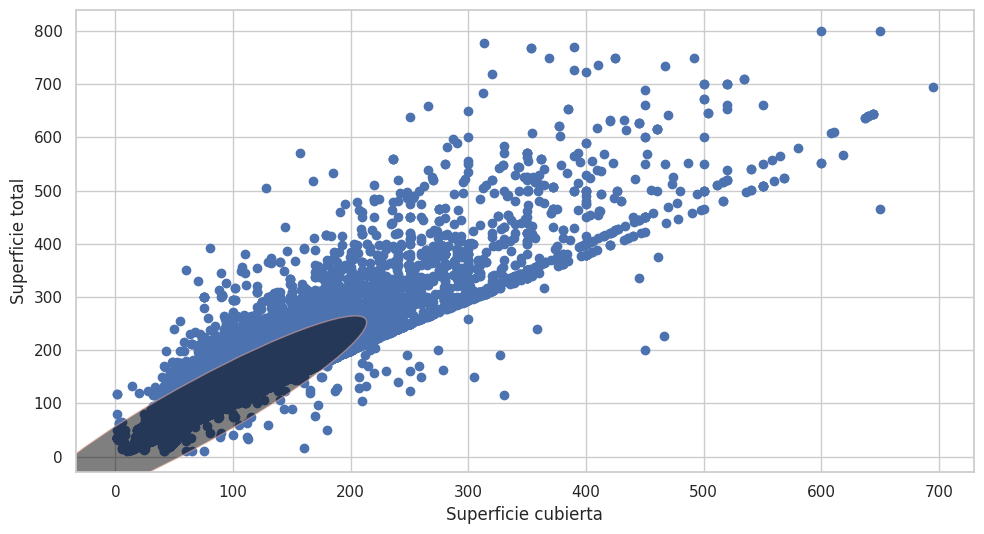

In [75]:
df_de_comparacion = df_preprocesado[['property_surface_covered','property_surface_total']]
df_aux = df_de_comparacion.copy()
df_aux = df_aux.to_numpy()
xlabel = 'Superficie cubierta'
ylabel = 'Superficie total'
outlierIndexes, covariance, centerpoint, cutoff = mahalanobis_outliers(df_aux, 0.99)

print_mahalanobis(df_aux, covariance, centerpoint, cutoff,xlabel, ylabel)

Aqui podemos observar que existe un aproximado del 7.6% de observaciones totales del dataset que no se encuentra contenido en el límite definido.

A continuacion definimos el tratamiento a seguir para este par de variables.

Si bien es una cantidad considerable de muestras a tener en cuenta y algunos de los valores observados tienen superficies de gran medida pero posibles en la realidad; con el proposito de preservar la futura comparabilidad más amena entre precios se decide eliminar las observaciones exluidas de la delimitación.

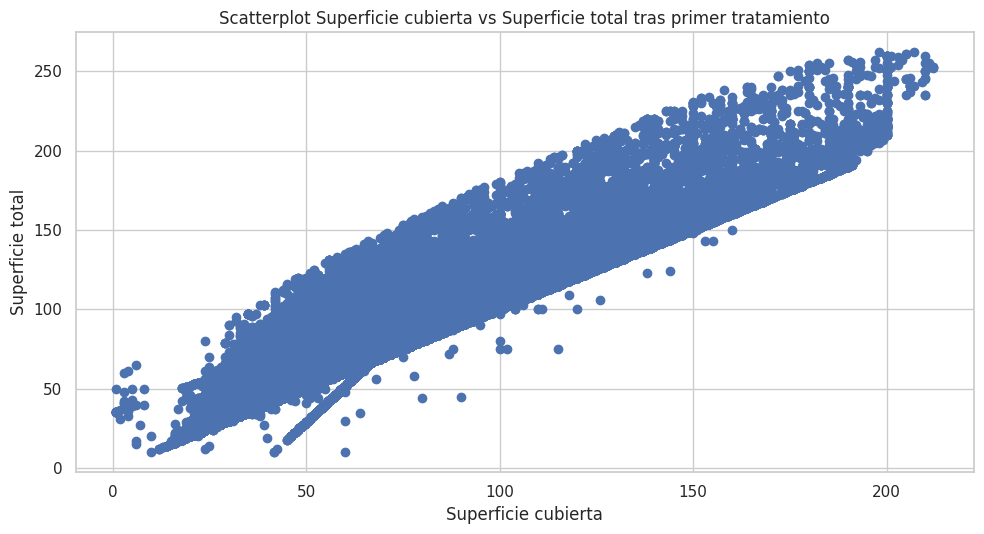

In [76]:
df_de_comparacion.drop(df_de_comparacion.index[outlierIndexes], inplace=True)

plt.scatter(df_de_comparacion.property_surface_covered, df_de_comparacion.property_surface_total)
plt.title('Scatterplot ' + xlabel + ' vs ' + ylabel + ' tras primer tratamiento')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(visible=True)
plt.show()

Ahora, se están manteniendo observaciones cuyos valores de superficies no corresponden a medidas posibles en la realidad. Especificamente son todas las observaciones que tienen una superficie total menor a su superficie de terreno cubierta. 

In [77]:
obs_with_unrealistic_surfaces_cond =  (df_de_comparacion['property_surface_total'] < df_de_comparacion['property_surface_covered'])

obs_with_unrealistic_surfaces_shape =  df_de_comparacion[
    obs_with_unrealistic_surfaces_cond
].shape

print('Cantidad de obs con Surface total < Surface covered:  {}'.format(obs_with_unrealistic_surfaces_shape[0]))

Cantidad de obs con Surface total < Surface covered:  1722


Dado que es una cantidad considerable de observaciones se decide reemplazar manualmente los valores de la variable `property_surface_total` (en las observaciones anomalas) para que correspondan con el mismo valor de `property_surface_covered`.

In [78]:
df_de_comparacion.loc[obs_with_unrealistic_surfaces_cond, 'property_surface_total'] = df_de_comparacion.loc[obs_with_unrealistic_surfaces_cond,'property_surface_covered']

A su vez se visualiza un pequeño grupo de observaciones cuya superficie cubierta parece ser muy cercana a cero, mientras que sus superficies totales llegan hasta los 50 m² aproximadamente.

In [79]:
obs_with_way_too_low_surf_covered_cond = (df_de_comparacion['property_surface_total'] < 50) & (df_de_comparacion['property_surface_covered'] < 10)

obs_with_way_too_low_surf_covered_shape =  df_de_comparacion[
    obs_with_way_too_low_surf_covered_cond
].shape

print('Cantidad obs con Surface total < 50 m²  y Surface covered < 10 m² :  {}'.format(obs_with_way_too_low_surf_covered_shape[0]))

df_de_comparacion[
    obs_with_way_too_low_surf_covered_cond
].head(10)

Cantidad obs con Surface total < 50 m²  y Surface covered < 10 m² :  42


,property_surface_covered,property_surface_total
1331,1.0,35.577383
1609,1.0,35.577383
1621,1.0,35.577383
1622,6.0,15.000000
2186,1.0,35.577383
3613,1.0,35.577383
8394,1.0,35.577383
8455,1.0,35.577383
8459,1.0,35.577383
8487,1.0,35.577383


In [80]:
obs_with_way_too_low_surf_covered_cond = (df_de_comparacion['property_surface_total'] > 30) & (df_de_comparacion['property_surface_covered'] < 2)

obs_with_way_too_low_surf_covered_shape =  df_de_comparacion[
    obs_with_way_too_low_surf_covered_cond
].shape
obs_with_way_too_low_surf_covered_indexes =  df_de_comparacion[
    obs_with_way_too_low_surf_covered_cond
].index

print('Cantidad obs con Surface total > 30 m²  y Surface covered < 2 m² :  {}'.format(obs_with_way_too_low_surf_covered_shape[0]))

Cantidad obs con Surface total > 30 m²  y Surface covered < 2 m² :  24


En principio se desconoce si estas observaciones se tratan de un error al ingresar los datos, y al tratarse de tan pocas observaciones se decide eliminarlas del dataset. 

In [81]:
df_de_comparacion.drop(index=obs_with_way_too_low_surf_covered_indexes, inplace=True)

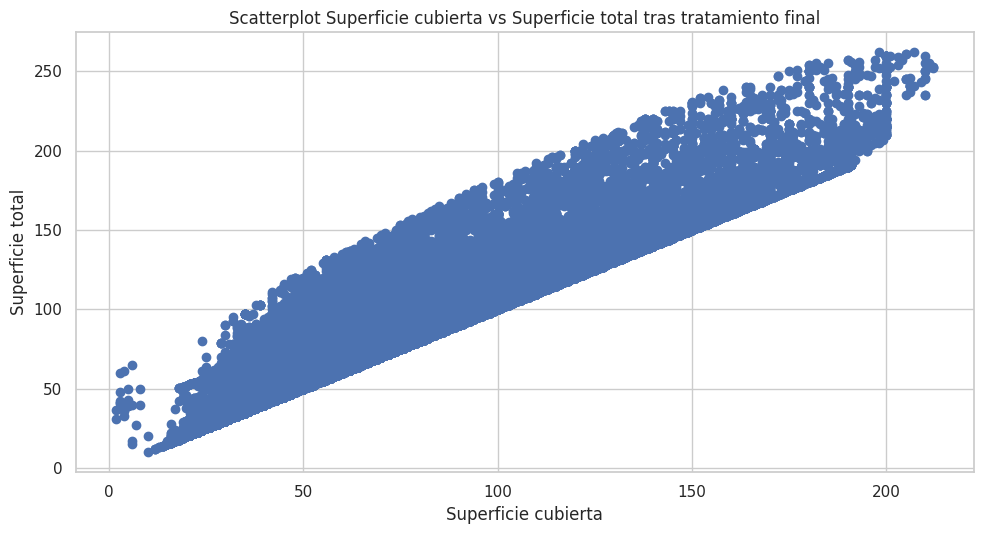

In [82]:
plt.scatter(df_de_comparacion.property_surface_covered, df_de_comparacion.property_surface_total)
plt.title('Scatterplot ' + xlabel + ' vs ' + ylabel + ' tras tratamiento final')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(visible=True)
plt.show()

Se sobreescribe el dataset con sus filas recien tratadas.

In [83]:
# Se descartan observaciones guardando solo los index indicados tras haber eliminado algunos
df_preprocesado = df_preprocesado.loc[df_de_comparacion.index, :]

# Se sobreescriben datos de las columnas cuyos valores fueron modificados
df_preprocesado['property_surface_total'] = df_de_comparacion['property_surface_total'].values
df_preprocesado['property_surface_covered'] = df_de_comparacion['property_surface_covered'].values

##### *Analisis de Dormitorios vs Ambientes*

--- Index of Outliers ----
(array([   74,   270,   273, ..., 82839, 82858, 82869]),)
--- Observations found as outlier -----
[[3. 3.]
 [7. 8.]
 [4. 6.]
 ...
 [5. 6.]
 [4. 4.]
 [2. 5.]]
Porcentaje de outliers: 4.550 %


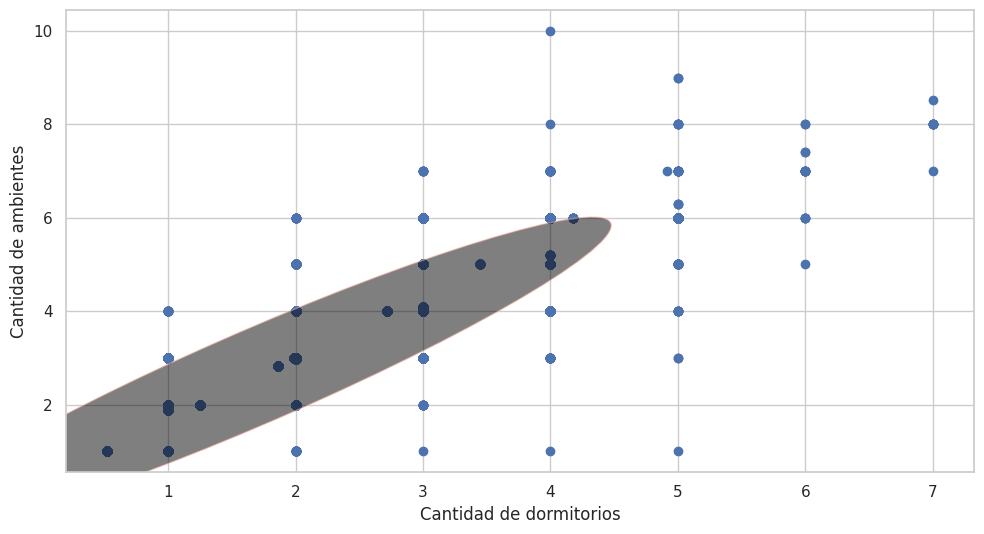

In [84]:
df_de_comparacion = df_preprocesado[['property_bedrooms','property_rooms']]
df_aux = df_de_comparacion.copy()
df_aux = df_aux.to_numpy()

xlabel = 'Cantidad de dormitorios'
ylabel = 'Cantidad de ambientes'
outlierIndexes, covariance, centerpoint, cutoff = mahalanobis_outliers(df_aux, 0.99)

print_mahalanobis(df_aux, covariance, centerpoint, cutoff, xlabel, ylabel)

Aquí en realidad lo unico que podriamos considerar anomalo serían:
- Observaciones cuya cantidad de dormitorios o ambientes no son numeros enteros. 
- Observaciones con mayor cantidad de dormitorios que de ambientes, ya que no tiene sentido. 

In [85]:
float_bedrooms_shape = df_de_comparacion[ df_de_comparacion['property_bedrooms'] % 1 != 0 ].shape
print('Cantidad de observaciones con bedrooms no enteras:  {}'.format(float_bedrooms_shape[0]))

float_bedrooms_indexes = df_de_comparacion[ df_de_comparacion['property_bedrooms'] % 1 != 0 ].index

float_rooms_shape = df_de_comparacion[ df_de_comparacion['property_rooms'] % 1 != 0 ].shape
print('Cantidad de observaciones con rooms no enteras:  {}'.format(float_rooms_shape[0]))

float_rooms_indexes = df_de_comparacion[ df_de_comparacion['property_rooms'] % 1 != 0 ].index

Cantidad de observaciones con bedrooms no enteras:  10209
Cantidad de observaciones con rooms no enteras:  580


In [86]:
unrealistic_bedrooms_shape = df_de_comparacion[ df_de_comparacion['property_bedrooms'] > df_de_comparacion['property_rooms']].shape
print('Cantidad de observaciones con bedrooms mayores a rooms:  {}'.format(unrealistic_bedrooms_shape[0]))

unrealistic_bedrooms_index = df_de_comparacion[ df_de_comparacion['property_bedrooms'] > df_de_comparacion['property_rooms']].index

Cantidad de observaciones con bedrooms mayores a rooms:  67


A continuacion se arreglan los valores redondeando los necesarios y eliminando los valores sin sentido.

In [87]:
df_de_comparacion['property_bedrooms'] = df_de_comparacion.property_bedrooms.round()
df_de_comparacion.drop(index=unrealistic_bedrooms_index,inplace=True)

df_de_comparacion['property_rooms'] = df_de_comparacion.property_rooms.round()

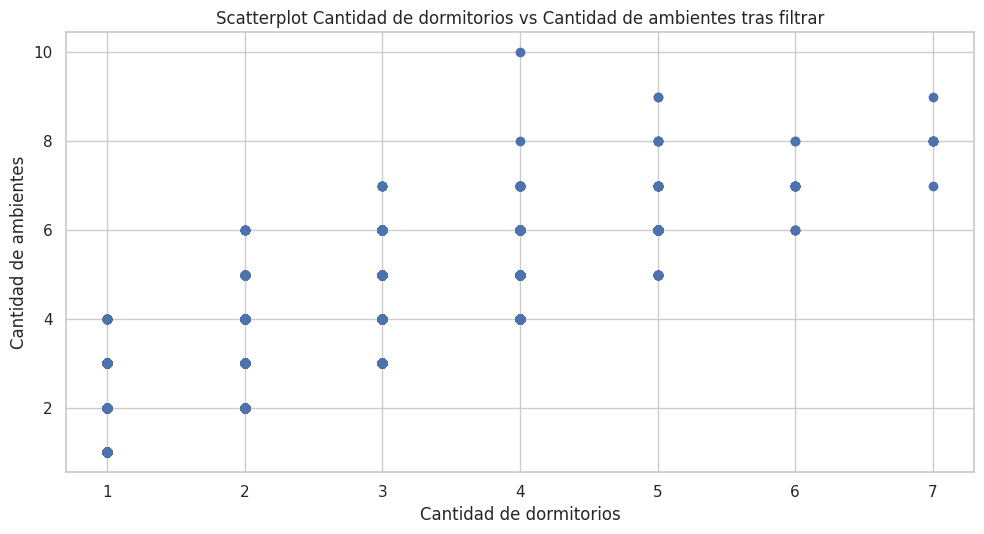

In [88]:
plt.scatter(df_de_comparacion.property_bedrooms, df_de_comparacion.property_rooms)
plt.title('Scatterplot ' + xlabel + ' vs ' + ylabel + ' tras filtrar')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(visible=True)
plt.show()

Se sobreescriben observaciones tras tratamiento en el dataset de trabajo

In [89]:
# Se descartan observaciones guardando solo los index indicados tras haber eliminado algunos
df_preprocesado = df_preprocesado.loc[df_de_comparacion.index, :]

# Se sobreescriben datos de las columnas cuyos valores fueron modificados
df_preprocesado['property_bedrooms'] = df_de_comparacion['property_bedrooms'].values
df_preprocesado['property_rooms'] = df_de_comparacion['property_rooms'].values

##### *Analisis de Precio vs Ambientes*

--- Index of Outliers ----
(array([  198,   199,   269, ..., 82843, 82846, 82848]),)
--- Observations found as outlier -----
[[5.9e+05 3.0e+00]
 [7.8e+05 4.0e+00]
 [7.5e+05 5.0e+00]
 ...
 [7.9e+05 3.0e+00]
 [5.2e+05 2.0e+00]
 [4.5e+05 2.0e+00]]
Porcentaje de outliers: 7.066 %


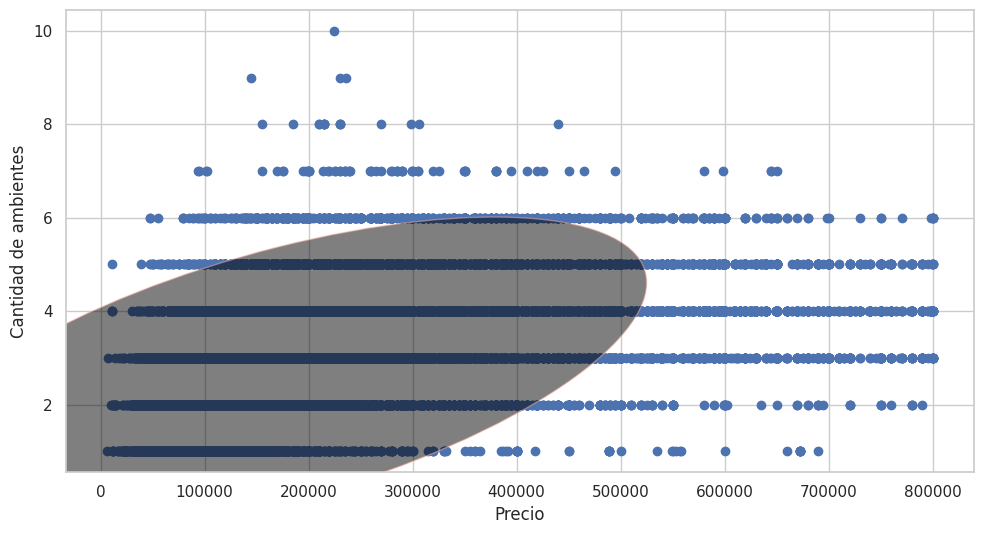

In [90]:
df_de_comparacion = df_preprocesado[['property_price', 'property_rooms']]
df_aux = df_de_comparacion.copy()
df_aux = df_aux.to_numpy()

xlabel = 'Precio'
ylabel = 'Cantidad de ambientes'
outlierIndexes, covariance, centerpoint, cutoff = mahalanobis_outliers(df_aux, 0.99)

print_mahalanobis(df_aux, covariance, centerpoint, cutoff, xlabel, ylabel)

Para este caso en principio no se observan valores evidentemente erroneos, por lo cual no se puede asumir que todas las observaciones por fuera del rango son anomalas a simple vista, dado que pueden representar valores reales.
Teniendo en cuenta además que posteriormente se va a querer utilizar la variable precio como target, se decide dejar sin modificación estas observaciones.

##### *Analisis de Precio vs Superficie total*

--- Index of Outliers ----
(array([  146,   198,   199, ..., 82843, 82846, 82848]),)
--- Observations found as outlier -----
[[3.95e+05 2.05e+02]
 [5.90e+05 1.07e+02]
 [7.80e+05 1.75e+02]
 ...
 [7.90e+05 1.76e+02]
 [5.20e+05 6.80e+01]
 [4.50e+05 8.60e+01]]
Porcentaje de outliers: 10.082 %


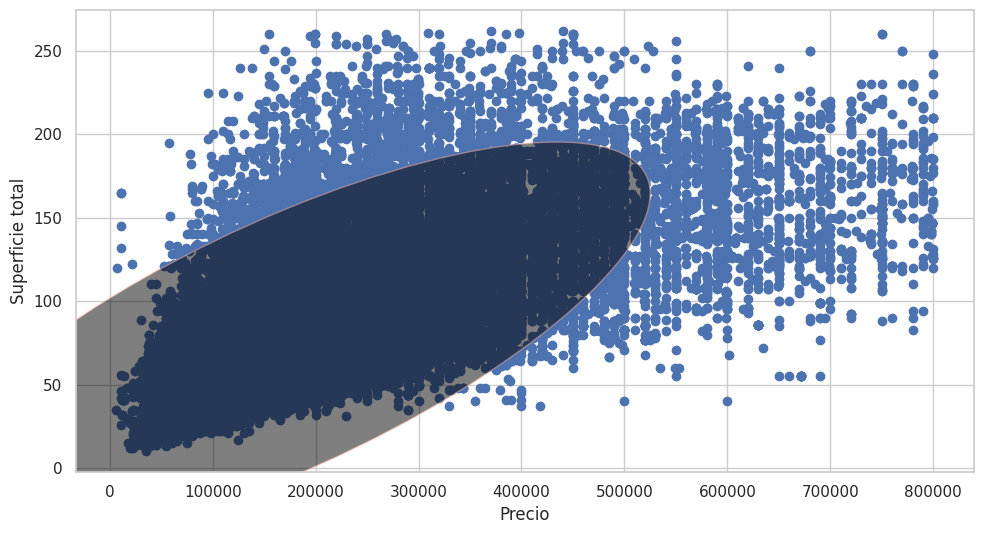

In [91]:
df_de_comparacion = df_preprocesado[['property_price', 'property_surface_total']]
df_aux = df_de_comparacion.copy()
df_aux = df_aux.to_numpy()

xlabel = 'Precio'
ylabel = 'Superficie total'
outlierIndexes, covariance, centerpoint, cutoff = mahalanobis_outliers(df_aux, 0.99)

print_mahalanobis(df_aux, covariance, centerpoint, cutoff, xlabel, ylabel)

Aqui nuevamente no se puede afirmar mucho acerca de los valores fuera de rango, adicionado a que la correlacion entre superficie total y precio es mucho menos acentuada. 

Sin embargo pueden llegar a verse como anómalos a aquellos con superficie total extremadamente baja a comparacion de su precio (por ejemplo propiedades con precios mayores a 300 mil USD cuya superficie total no excede de los 50 m²) 

Se procede entonces a remover las observaciones recientemente mencionadas por su contraste alto.

In [92]:
weird_price_vs_surface_relation_shape = df_de_comparacion[ 
        (df_de_comparacion['property_price'] > 3e5) & (df_de_comparacion['property_surface_total'] < 50) 
    ].shape
weird_price_vs_surface_relation_indexes = df_de_comparacion[ 
        (df_de_comparacion['property_price'] > 3e5) & (df_de_comparacion['property_surface_total'] < 50) 
    ].index
print('Cantidad de observaciones con relacion precio-superficie anomala:  {}'.format(weird_price_vs_surface_relation_shape[0]))

df_de_comparacion.drop(index=weird_price_vs_surface_relation_indexes, inplace=True)

Cantidad de observaciones con relacion precio-superficie anomala:  22


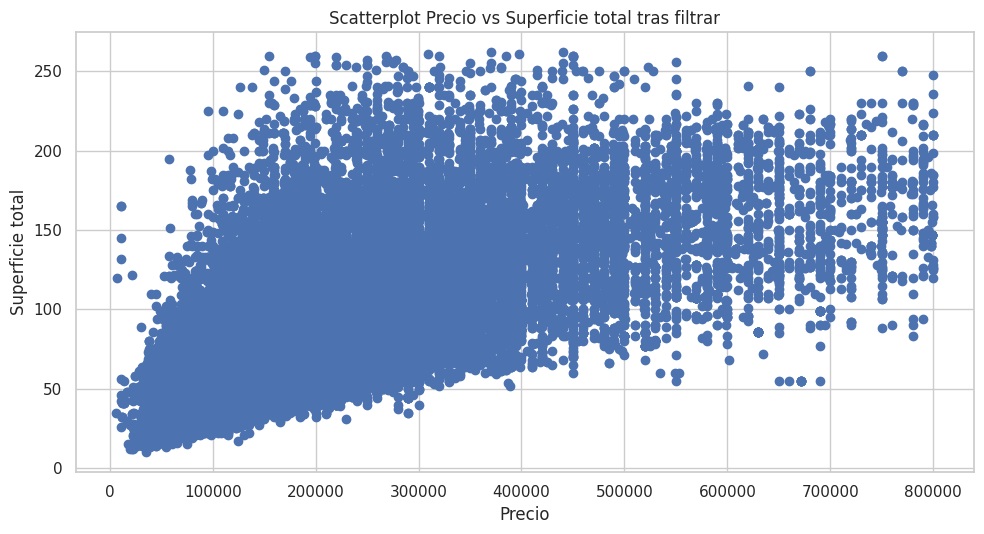

In [93]:
plt.scatter(df_de_comparacion.property_price, df_de_comparacion.property_surface_total)
plt.title('Scatterplot ' + xlabel + ' vs ' + ylabel + ' tras filtrar')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(visible=True)
plt.show()

Se sobreescribe el dataset con los valores recien modificados

In [94]:
# Se descartan observaciones guardando solo los index indicados tras haber eliminado algunos
df_preprocesado = df_preprocesado.loc[df_de_comparacion.index, :]

### d) Reducción de la dimensionalidad

Realizamos una reducción de la dimensionalidad buscando componentes principales en el dataset mediante el algoritmo PCA. Para ello seleccionamos las variables compatibles con el algoritmo, las variables de carácter cuantitativo.

Otros algoritmos como MDS o TSNE no lograron correr con este dataset completo.

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ds_pca = df_preprocesado.copy().select_dtypes(include=np.number)
# xpca = ds_pca[variables_pca].values
xpca = ds_pca.values
# normalizamos los valores
xpca = StandardScaler().fit_transform(xpca)
pca = PCA(n_components = None, random_state = 2)
pca.fit(xpca)
pca.explained_variance_ratio_.cumsum()

array([0.58497388, 0.75316643, 0.88807796, 0.9530021 , 0.98189945,
       0.99287228, 1.        ])

In [96]:
ds_pca

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
1,-34.637319,-58.361124,3.0,2.0,58.000000,55.0,82900.0
2,-34.628647,-58.361871,4.0,3.0,70.000000,70.0,99000.0
3,-34.610027,-58.401934,4.0,2.0,124.408727,104.0,146000.0
4,-34.631621,-58.416825,4.0,2.0,97.673080,73.0,250000.0
5,-34.623886,-58.412746,2.0,1.0,61.000000,46.0,100000.0
...,...,...,...,...,...,...,...
94244,-34.603245,-58.489810,4.0,3.0,130.000000,100.0,220000.0
94245,-34.614063,-58.482814,3.0,2.0,68.000000,60.0,161000.0
94246,-34.614175,-58.479062,1.0,1.0,51.000000,30.0,75500.0
94247,-34.614175,-58.479062,1.0,1.0,37.000000,31.0,74500.0


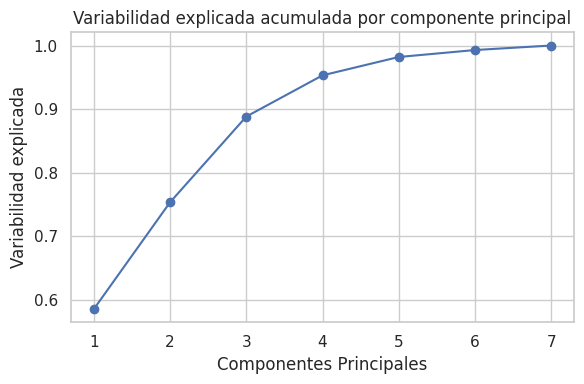

In [97]:
pca_varianza_explicada = pca.explained_variance_ratio_.cumsum()
list_x = list(range(1, len(pca_varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, pca_varianza_explicada, '-o')
plt.xlabel('Componentes Principales')
plt.ylabel('Variabilidad explicada')
plt.title('Variabilidad explicada acumulada por componente principal')
plt.show()

Vemos que con 2 de 5 componentes principales tenemos mas del 90% de la variabilidad total.

Entonces entrenamos PCA para 2 componentes y graficamos el resultado.

In [98]:
pca = PCA(n_components = 2, random_state = 2)
xpca_transformada = pca.fit_transform(xpca)
df_pca = pd.DataFrame(
    data = xpca_transformada,
    columns = ['cp1','cp2']
)

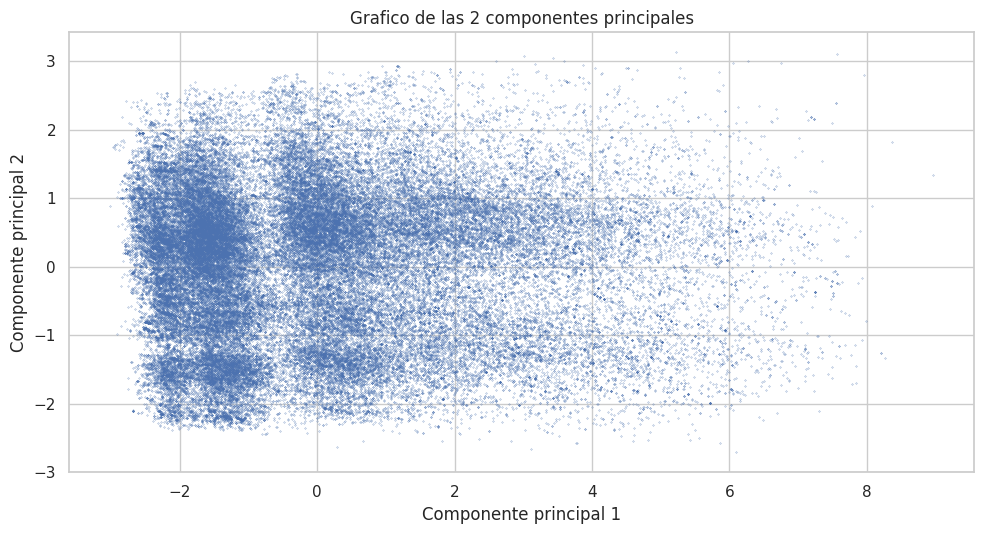

In [99]:
plt.scatter(x=df_pca['cp1'], y=df_pca['cp2'], s=0.2, marker='.')
plt.title('Grafico de las 2 componentes principales')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

Como vimos en el primer gráfico, con las dos primeras componentes principales podriamos explicar mas del 90% de la varianza total de los datos.

Si observamos el grafico de dispersión, vemos como se forman algunos grupos distribuidos entre las dos componentes principales

#### Guardamos el dataset tras el preprocesado completo y el de componentes principales

In [100]:
df_preprocesado.to_csv('df_preprocesado.csv', index=False)
df_pca.to_csv('df_pca.csv', index=False)

#### Guardamos el modelo PCA en un archivo

In [101]:
from joblib import dump
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

---

## Continuamos con la sección Agrupamiento (2) en notebook ENTREGA_N2  

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>